<a href="https://colab.research.google.com/github/Candelaria-Arpajou/Espacios_Verdes_Grupo2/blob/main/Exploracion_y_Curacion_MEV_TP_Grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoria: Monitoreo de Espacios Verdes

__DIPLODATOS 2022 - FAMAF UNC__

_Felix Rojo Lapalma_

## Exploración y Curación de Datos 

En esta etapa ya hemos avanzado en (basados en el [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)):

- análisis y exploración del conjunto de datos (aunque sea superficialmente)
- set representativo: Es decir, aprendimos que podemos llegar a trabajar con un set mas reducido (de las caracteristicas - columnas del dataframe) e igualmente vamos a estar representando gran parte del conjunto.
- imputacion de valores:   
    - tenemos formas de imputar valores en rangos temporales que no tenemos (para una cierta zona) utilizando otros rangos temporales (aqui aprovechamos fuertemente la estacionalidad de lo que estamos monitoreando)
    - que un outlier en un rango temporal puede ser un valor nominal en otro rango temporal.

- etc

En lo que sigue vamos a aplicar mucho de lo obtenido en el TP anterior para "curar" nuestro dataset con diferentes recetas. Por curar nos referimos a generar los procesos necesarios (trazables y reproducibles) que nos lleven del conjunto original de datos (que debe permanecer inmutable) hasta un conjunto que pueda ser consumido por distintos algorimos de aprendizaje. Las recetas pasaran de las mas simples, hasta algunas mas elaboradas. Una de las intenciones de todo proceso de curacion es salvar, en base a ciertos supuestos, la mayor cantidad de datos (puesto que la recoleccion de los mismos, etc, suele ser un proceso costoso tanto en recursos como en tiempo, entre otras cosas).

### Fuentes

El presente trabajo práctico está inspirado en los correspondientes de:

- [jbergamasco2019](https://github.com/jbergamasco/DiploDatos2019)

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)

Para una introducción un poco mas extensa respecto al origen de los datos y su procesamiento se pueden referir a :
- [ab-initio-data-build](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md)
- [ab-initio-analisis-visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-analisis-visualizacion.md)


## Sobre el Trabajo Requerido

Se propone la elaboración de un conjunto de procedimientos (\*.py o notebooks) que nos permitan partiendo del dataset original obtener uno nuevo y "curado".
Respecto a las recetas mencionadas, son las que van a dar origen a los distintos procedimientos y nos van a permitir inferir (ya en el proximo TP) la importancia del proceso de curación.

### Sobre las recetas

La idea de construccion de una receta es que pueda ser aprovechada cuando le llegue un set nuevo de datos. Tanto  para su transformacion para incorporarlos al set de entramiento como para su posible uso en inferencia.

__DISCLAIMER__: En lo siguiente vamos a presentar un numero limitado (~4) de recetas (para el problema en cuestión).

### ab-initio

- elija (basados en lo aprendido en el TP anterior) un conjunto de bandas e indices que considere representativo. Adicione a su elección:
    - raster: raster del cual se extraen los estadísticos
    - clouds_on_raster: nubosidad del raster completo
    - osm_id: identificador asociado a la capa original (atlas-espacios-verdes)
    - area_m2: area en metros cuadrados
    - date: fecha de la muestra.
    
    estas variables las sumamos a los efectos practicos de representacion y filtrado.



### [A] Esfuerzo Nulo

- Leer los datos
- Extraer las columnas de interes (## ab-initio)
- Desechar valores nulos
- Filtrar por nubosidad < 10%
- Remocion de Outliers (a nivel general sin considerar estacionalidad)
- Grabar los datos transformados

### [B] Imputacion General + Filtrado Por Nubosidad 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)
- Remoción de Outliers (a nivel general sin considerar estacionalidad)
- Imputar valores nulos (definir el criterio, o estadistico, _media_, _mediana_, etc)
- Filtrar por nubosidad < 10%
- Grabar los datos transformados


### [C] Imputacion Estacional + Filtrado Por Nubosidad 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)
- Remoción de Outliers (a nivel estacional - SIN refinar por año)
- Imputar valores nulos (a nivel estacional - definir el criterio, o estadistico, _media_, _mediana_, etc)
- Filtrar por nubosidad:
    - < 20%
    - < 40%
- Grabar los datos transformados


### [D] Imputacion Estacional + Filtrado Por Nubosidad + Normalizacion 

__NOTA__: Para ciertos algoritmos puede ser necesario normalizar los datos (para facilitar su convergencia). Se le ocurre alguna forma de hacerlo? (Existen muchas alternativas, elija alguna de ellas - justificando su eleccion). Utilizando alguna que le parezca interesante, actualice la siguiente receta basada en [C]

- Leer los datos
- Extraer las columnas de interes (## ab-initio)
- Remoción de Outliers (a nivel estacional - SIN refinar por año)
- Imputar valores nulos (definir el criterio, o estadistico, _media_, _mediana_, etc)
- Filtrar por nubosidad:
    - < 40%
- __NORMALIZACION__
- Grabar los datos transformados


## Sugerencia

Considere cada paso de la receta como una función. Es decir al finalizar una receta tendra tantas funciones como pasos. Esto le va a permitir reordenar y reutilizar las mismas sin necesidad de reescribir ningun codigo extra. Esto le sera particularmente util para una de las preguntas de la siguiente sección.


## Recetas + Comparativa

Una vez generadas las recetas se debera generar una suerte de tabla comparativa entre las mismas, poniendo de relevancia la cantidad de datos desechados/recuperados en cada instancia. _Note que todos las recetas tienen un mismo eje_.

¿Cual es su percepcion de como resultaran cada una de las recetas en un algoritmo de aprendizaje?

¿Que pasa si en la receta [C] o [D] primero filtra por nubosidad y despues remueve outliers? Considere esto como variante y definalo como [C-1] y [C-2] ([D-1]/[D-2]).





## __Extra__

Generar alguna receta alternativa, basada en las propuestas mencionadas (o alguna completamente diferente :-) ).




#Resolución

## ab-initio

- elija (basados en lo aprendido en el TP anterior) un conjunto de bandas e indices que considere representativo. Adicione a su elección:
    - raster: raster del cual se extraen los estadísticos
    - clouds_on_raster: nubosidad del raster completo
    - osm_id: identificador asociado a la capa original (atlas-espacios-verdes)
    - area_m2: area en metros cuadrados
    - date: fecha de la muestra.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    # running on colab
    # from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
    !gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy
    # Notar el cambio del path y el tipo de archivo (no lo descomprimimos)
    df_=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
else:
    # recuerde descargar el dataset desde los links mencionados en el README
    df_=pd.read_csv('../data/cba/espacios-verdes-indexs-cba-20170101-20220420.csv',index_col=0)

Running on CoLab
Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: /content/espacios-verdes-indexs-cba-20170101-20220420.zip
100% 170M/170M [00:01<00:00, 110MB/s]


En el trabajo práctico anterior se optó por trabajar con la mediana de los índices y bandas que figuran en nuestro dataset. Mediante un análisis de correlación de Pearson, se decidió que el conjunto de bandas e índices representativos sería el siguiente:

* ndvi
* mNDVI
* gari
* tcariOsavi
* sipi
* ndii
* B04
* B08
* B11

In [ ]:
INDICES_BANDAS=["ndvi_median", "mNDVI_median", "gari_median","tcariOsavi_median", "sipi_median", 
                "ndii_median", "B04_median", "B08_median", "B11_median"]

add= ["raster", "clouds_on_raster", "area_m2", "date", "osm_id"]

columnas_interes= INDICES_BANDAS + add


In [ ]:
df_initio = df_[columnas_interes]

In [ ]:
df_initio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208932 entries, 0 to 208931
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ndvi_median        167260 non-null  float64
 1   mNDVI_median       167260 non-null  float64
 2   gari_median        167260 non-null  float64
 3   tcariOsavi_median  167260 non-null  float64
 4   sipi_median        167260 non-null  float64
 5   ndii_median        167260 non-null  float64
 6   B04_median         167263 non-null  float64
 7   B08_median         167263 non-null  float64
 8   B11_median         167262 non-null  float64
 9   raster             208932 non-null  object 
 10  clouds_on_raster   208932 non-null  float64
 11  area_m2            208932 non-null  float64
 12  date               208932 non-null  object 
 13  osm_id             208932 non-null  int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 23.9+ MB


In [ ]:
df_initio.shape

(208932, 14)

In [ ]:
df_initio.describe()

ndvi_median   mNDVI_median   gari_median  tcariOsavi_median  \
count  167260.000000  167260.000000  1.672600e+05      167260.000000   
mean        0.373979       1.085201  1.017226e+33           0.182268   
std         0.132312       0.812463  4.160192e+35           0.082500   
min        -0.217929     -15.764715 -3.473328e+01          -6.793653   
25%         0.267362       0.880755  8.934892e-01           0.154415   
50%         0.369258       1.079537  1.084467e+00           0.193955   
75%         0.478579       1.252952  1.249073e+00           0.224973   
max         0.772912     172.330429  1.701412e+38           1.954518   

         sipi_median    ndii_median     B04_median     B08_median  \
count  167260.000000  167260.000000  167263.000000  167263.000000   
mean        0.969624       0.067789       0.125373       0.271873   
std         0.253205       0.088415       0.045794       0.055516   
min       -22.149998      -0.297335       0.028200       0.024750   
25%         0.891668      -0.002238       0.094500       0.237100   
50%         0.956522       0.063278       0.118050       0.272500   
75%         1.054187       0.129625       0.146800       0.305900   
max        16.321413       0.672468       0.758600       0.868800   

          B11_median  clouds_on_raster       area_m2        osm_id  
count  167262.000000     208932.000000  2.089320e+05  2.089320e+05  
mean        0.238991         19.473638  1.249388e+04  4.343631e+08  
std         0.057024         33.424013  7.895730e+04  2.141069e+08  
min         0.021300          0.000000  4.225951e+02  1.331006e+06  
25%         0.204150          0.000000  2.066559e+03  2.867065e+08  
50%         0.238100          0.000000  3.812182e+03  3.596742e+08  
75%         0.274000         25.009939  6.644794e+03  6.059767e+08  
max         0.806100        100.000000  1.370630e+06  9.249657e+08

## [A] Esfuerzo Nulo

- Leer los datos
- Extraer las columnas de interes (## ab-initio)
- Desechar valores nulos
- Filtrar por nubosidad < 10%
- Remocion de Outliers (a nivel general sin considerar estacionalidad)
- Grabar los datos transformados


**Desechar valores nulos**

In [ ]:
#Leer los datos
#Extraer columnas de interés
df_A= df_initio.copy()

In [ ]:
df_A.isna().sum()

ndvi_median          41672
mNDVI_median         41672
gari_median          41672
tcariOsavi_median    41672
sipi_median          41672
ndii_median          41672
B04_median           41669
B08_median           41669
B11_median           41670
raster                   0
clouds_on_raster         0
area_m2                  0
date                     0
osm_id                   0
dtype: int64

In [ ]:
df_A.describe()

ndvi_median   mNDVI_median   gari_median  tcariOsavi_median  \
count  167260.000000  167260.000000  1.672600e+05      167260.000000   
mean        0.373979       1.085201  1.017226e+33           0.182268   
std         0.132312       0.812463  4.160192e+35           0.082500   
min        -0.217929     -15.764715 -3.473328e+01          -6.793653   
25%         0.267362       0.880755  8.934892e-01           0.154415   
50%         0.369258       1.079537  1.084467e+00           0.193955   
75%         0.478579       1.252952  1.249073e+00           0.224973   
max         0.772912     172.330429  1.701412e+38           1.954518   

         sipi_median    ndii_median     B04_median     B08_median  \
count  167260.000000  167260.000000  167263.000000  167263.000000   
mean        0.969624       0.067789       0.125373       0.271873   
std         0.253205       0.088415       0.045794       0.055516   
min       -22.149998      -0.297335       0.028200       0.024750   
25%         0.891668      -0.002238       0.094500       0.237100   
50%         0.956522       0.063278       0.118050       0.272500   
75%         1.054187       0.129625       0.146800       0.305900   
max        16.321413       0.672468       0.758600       0.868800   

          B11_median  clouds_on_raster       area_m2        osm_id  
count  167262.000000     208932.000000  2.089320e+05  2.089320e+05  
mean        0.238991         19.473638  1.249388e+04  4.343631e+08  
std         0.057024         33.424013  7.895730e+04  2.141069e+08  
min         0.021300          0.000000  4.225951e+02  1.331006e+06  
25%         0.204150          0.000000  2.066559e+03  2.867065e+08  
50%         0.238100          0.000000  3.812182e+03  3.596742e+08  
75%         0.274000         25.009939  6.644794e+03  6.059767e+08  
max         0.806100        100.000000  1.370630e+06  9.249657e+08

Como se puede observar, todos los índices y bandas elegidos para el análisis poseen valores faltantes. A continuación, eliminamos todos los datos faltantes tal como propone la receta.

In [ ]:
df_A_imput=df_A.copy()
df_A_imput.dropna(how='any',inplace=True)


In [ ]:
df_A_imput.isna().sum()

ndvi_median          0
mNDVI_median         0
gari_median          0
tcariOsavi_median    0
sipi_median          0
ndii_median          0
B04_median           0
B08_median           0
B11_median           0
raster               0
clouds_on_raster     0
area_m2              0
date                 0
osm_id               0
dtype: int64

Veamos también en esta instancia si hay algún registro donde el área en $m^{2}$ sea igual a cero para así eliminarlo.

In [ ]:
df_A_imput[df_A_imput['area_m2'] == 0].shape[0]

0

**Filtrar por nubosidad**

In [ ]:
mask_clouds= df_A_imput['clouds_on_raster'] < 10
df_A_clouds= df_A_imput[mask_clouds]

**Remoción de outliers**


En el trabajo práctico anterior vimos que algunas variables tienen distribuciones de carácter más normal y otras con comportamiento más asimétrico. En una primera instancia se podría optar por algún método de remoción de valores atípicos basados en dichas distribuciones, es decir, de forma más personalizada para cada variable. Sin embargo, usaremos el enfoque IQR (Inter Quartile Range) para cada una de ellas.

Un outlier es un dato que no encaja bien dentro de la distribución de los otros datos. Para el caso de los diagramas de caja y bigotes, podemos definir cuáles puntos son outliers de acuerdo a la distancia que los separa de la caja del diagrama. En general, el determinar cuáles datos son outliers responde, de algún modo, a criterios arbitrarios. Sin embargo, hay vasta bibliografía que utiliza el rango intercuartil como medida básica de distancia entre los puntos que son considerados outliers y los que no lo son. A este método de decisión se lo denomina IQR.

Criterios:

* Un outlier ligero es un punto que se ubica a una distancia que va desde 1.5 veces a 3 veces el IQR, medida a partir de la caja.
* Un outlier extremo es un punto que se ubica a una distancia de más de 3 veces el IQR, medida a partir de la caja.

Veamos ahora, por medio de boxplots, cuánto aportará cada índice y banda en la remoción de outliers.
Tengamos en cuenta que a esta altura  hemos aplicado una máscara para la nubosidad y también le imputamos (eliminamos) valores faltantes, por lo que el DataFrame df_A_clouds tiene una dimensión más pequeña que el original.

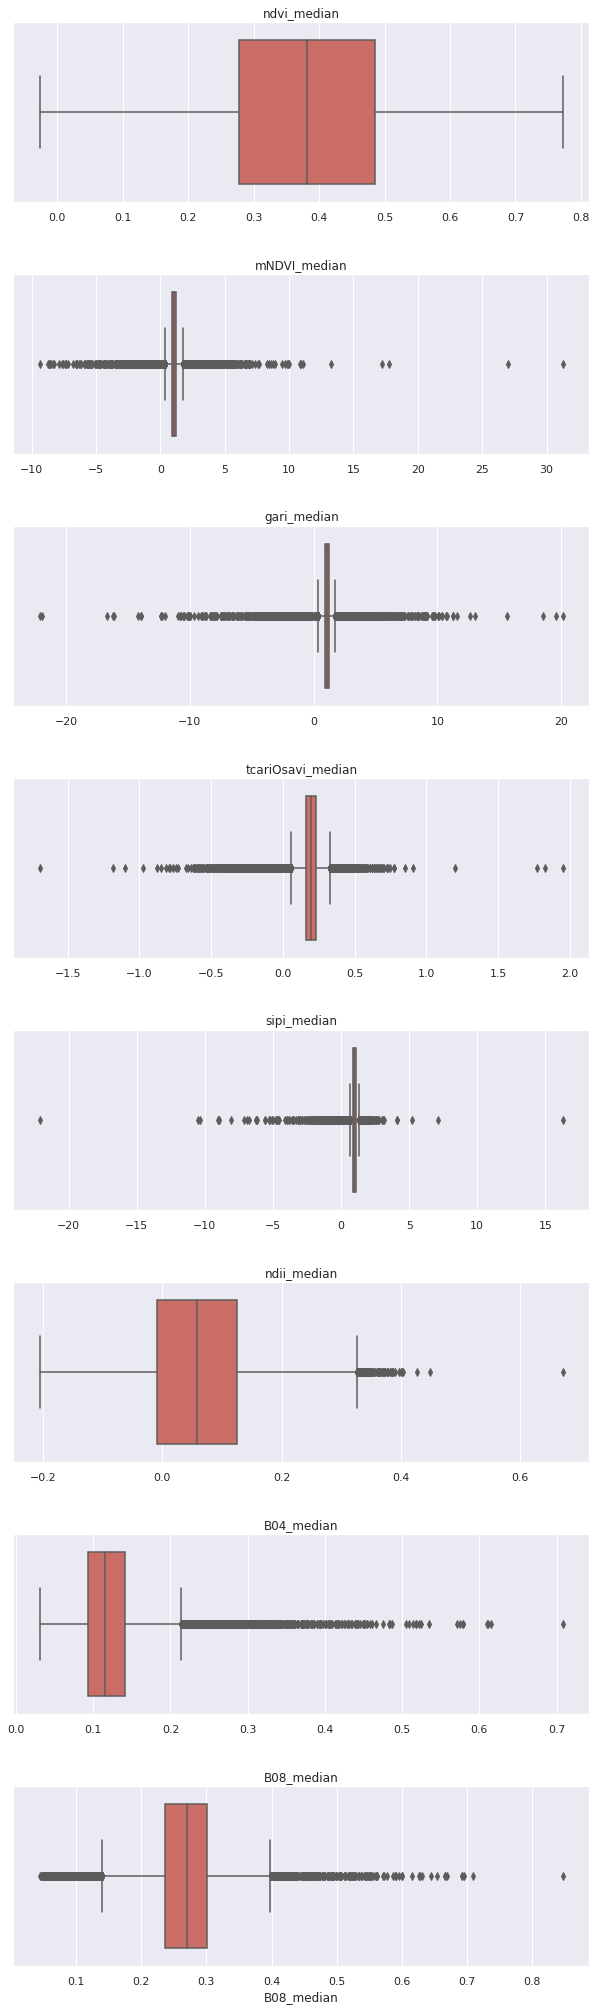

In [ ]:
fig, ejes = plt.subplots(8, 1, figsize=(10, 30))
for nombre, eje in zip(INDICES_BANDAS, ejes):
    sns.boxplot(data=df_A_clouds, x=df_A_clouds[nombre], ax=eje, palette="hls")
    eje.set_title(nombre)
   
    if eje != ejes[-1]:
        eje.set_xlabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

El boxplot de cada variable muestra el comportamiento atípico de los valores, que como se puede observar, en la mayoría de los casos estos registros componen un número considerable del conjunto de datos, excepto para el ndvi_median.


La función IQR_Outliers nos da un resumen detallado acerca de la ubicación y cantidad de outliers para el conjunto de features que tenga como entrada.

In [ ]:
def IQR_Outliers (X, features):

    print('Número de variables: ', len(features))
    print('Features: ', features)

    indices = [x for x in X.index]
    #print(indices)
    print('Número de muestras: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        print ('\nFeature: ', col)
        print ('Límites superior e inferior: ', upper, lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        print('Número de outliers: ', len(outliers))
        print('Índice de outliers: ', outliers_index)
        print('Outliers: ', outliers)
        
        out_indexlist.extend(outliers_index)
        
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNúmero de filas con outliers: ', len(out_indexlist))
    print('Lista de filas con outliers: ', out_indexlist)

**Información de outliers receta A**

In [ ]:
IQR_Outliers(df_A_clouds, INDICES_BANDAS)

Número de variables:  9
Features:  ['ndvi_median', 'mNDVI_median', 'gari_median', 'tcariOsavi_median', 'sipi_median', 'ndii_median', 'B04_median', 'B08_median', 'B11_median']
Número de muestras:  137328

Feature:  ndvi_median
Límites superior e inferior:  0.7974737994372842 -0.033431727439165004
Número de outliers:  0
Índice de outliers:  []
Outliers:  []

Feature:  mNDVI_median
Límites superior e inferior:  1.7709722891449933 0.3389986529946324
Número de outliers:  6213
Índice de outliers:  [143, 2883, 3232, 3602, 3616, 3619, 4362, 4377, 6824, 6854, 6855, 6886, 6889, 6892, 6895, 6899, 6907, 6915, 6918, 6926, 6928, 6932, 6933, 6934, 6945, 6950, 6956, 6965, 6970, 6971, 6973, 6977, 6979, 6980, 6981, 6982, 6988, 6989, 6994, 6999, 7001, 7009, 7017, 7022, 7028, 7036, 7037, 7049, 7050, 7083, 7094, 7104, 7109, 7113, 7144, 7149, 7156, 7166, 7170, 7172, 7173, 7175, 7176, 7181, 7182, 7184, 7185, 7186, 7189, 7190, 7194, 7196, 7206, 7208, 7209, 7212, 7217, 7224, 7226, 7231, 7236, 7237, 7244, 7256,

La salida anterior nos dice que el dataset que estamos utilizando para esta receta quedará, luego de la limpieza de outliers, con una dimensión mucho menor que el original. 

La siguiente función la utilizamos para remover outliers.

In [ ]:
def CustomSampler_IQR (X, features):
      
    df = X.copy()
    
    
    indices = [x for x in df.index]    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(df[col], 25.)
        Q3 = np.nanpercentile(df[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
                
        outliers_index = df[col][(df[col] < lower) | (df[col] > upper)].index.tolist()
        outliers = df[col][(df[col] < lower) | (df[col] > upper)].values        
        out_indexlist.extend(outliers_index)
        
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    
    clean_data = np.setdiff1d(indices,out_indexlist)

    return X.loc[clean_data]

In [ ]:
#DataFrame de la receta A, con limpieza de outliers
df_A_clear= CustomSampler_IQR(df_A_clouds, INDICES_BANDAS)


In [ ]:
print(f"La cantidad original de registros de la receta A es: {df_A.shape[0]}")
print(f"La cantidad de registros de la receta A, filtrado por nubosidad y sin valores faltantes es: {df_A_imput.shape[0]}")
print(f"La cantidad de registros de la receta A luego de la limpieza es: {df_A_clear.shape[0]}")

La cantidad original de registros de la receta A es: 208932
La cantidad de registros de la receta A, filtrado por nubosidad y sin valores faltantes es: 167260
La cantidad de registros de la receta A luego de la limpieza es: 117795


**Resumen de outliers receta A**

La siguiente función nos ayudará a resumir de forma sintética la cantidad de outliers tratados.

In [ ]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return minimum, maximum

In [ ]:
def count_outliers(df_in, col_name):
    minimum, maximum = get_iqr_values(df_in, col_name) 
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

Contador de outliers para el DataFrame en la instancia: desecho de valores faltantes + filtrado por nubosidad

In [ ]:
for i in INDICES_BANDAS:
  print(f"La columna {i} tiene {count_outliers(df_A_clouds, i)} outliers.")
  

La columna ndvi_median tiene 0 outliers.
La columna mNDVI_median tiene 6213 outliers.
La columna gari_median tiene 4564 outliers.
La columna tcariOsavi_median tiene 9612 outliers.
La columna sipi_median tiene 9437 outliers.
La columna ndii_median tiene 136 outliers.
La columna B04_median tiene 1822 outliers.
La columna B08_median tiene 1753 outliers.
La columna B11_median tiene 1958 outliers.


In [ ]:
contador_IQR= 0
for i in INDICES_BANDAS:
  contador_IQR += count_outliers(df_A_clouds, i)



Contador de outliers para el DataFrame en la instancia: desecho de valores faltantes + filtrado por nubosidad + limpieza de outliers

In [ ]:
for i in INDICES_BANDAS:
  print(f"La columna {i} tiene {count_outliers(df_A_clear, i)} outliers.")

La columna ndvi_median tiene 1 outliers.
La columna mNDVI_median tiene 1232 outliers.
La columna gari_median tiene 127 outliers.
La columna tcariOsavi_median tiene 2840 outliers.
La columna sipi_median tiene 2959 outliers.
La columna ndii_median tiene 22 outliers.
La columna B04_median tiene 273 outliers.
La columna B08_median tiene 13 outliers.
La columna B11_median tiene 145 outliers.


In [ ]:
contador_IQR_clear= 0
for i in INDICES_BANDAS:
  contador_IQR_clear += count_outliers(df_A_clear, i)


In [ ]:
#Resumen:
print(f"El dataset de la receta A, filtrado por nubosidad y sin valores faltantes, tiene {contador_IQR} outliers")

print(f"El dataset de la receta A luego del tratamiento de outliers tiene {contador_IQR_clear} outliers.")

El dataset de la receta A, filtrado por nubosidad y sin valores faltantes, tiene 35495 outliers
El dataset de la receta A luego del tratamiento de outliers tiene 7612 outliers.


**Isolation Forest: detección de outliers**

El siguiente es un método que más robusto para la toma de decisiones a la hora de elegir qué se considera valor atípico o no. El método IQR no es muy adecuado para variables con distribuciones demasiado sesgadas, veamos si con Isolation Forest podemos ser un poco más precisos en dicha determinación. 

Isolation Forest, o iForest, es el método presentado por Liu, Ting, y Zhou (2009) donde se trata el tema de detección de atípicos desde un punto de vista diferente. Ese punto de vista se basa en dos propiedades relacionadas con la idea de qué es un valor atípico: son la minoría de un conjunto y tienen unos atributos muy diferentes a los de las observaciones normales. Es decir, las anomalías son pocas y diferentes, lo que las hace más propensas a encontrarse aisladas del resto. Por esta razón los autores presentan un método basado en construir un árbol que aísle cada observación, de tal modo que los valores atípicos se encontrarán en ramas más próximas a la raíz y los valores normales se encontrarán en zonas más profundas del árbol. Es por ello que iForest (Liu et al., 2009), se distingue del resto de mecanismos basados en modelos, distancias o densidades.

https://betterprogramming.pub/anomaly-detection-with-isolation-forest-e41f1f55cc6

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
df_A_IF= df_initio.copy()
df_A_IF= df_A_IF[columnas_interes]

In [ ]:
mask_clouds= df_A_IF['clouds_on_raster'] < 10
df_A_IF= df_A_IF[mask_clouds]

In [ ]:
df_A_IF.dropna(how='any',inplace=True)

In [ ]:
df_A_IF.shape

(137328, 14)

In [ ]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=9, 
                          bootstrap=False, n_jobs=-1, random_state=1)



In [ ]:
pred= iforest.fit_predict(df_A_IF[INDICES_BANDAS]) 
df_A_IF['puntuaciones']=iforest.decision_function(df_A_IF[INDICES_BANDAS]) 
df_A_IF['anomaly_label']=pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Cuando la etiqueta es igual a -1, indica que tenemos anomalías. Si la etiqueta es 1, tenemos inliers .

In [ ]:
df_A_IF[df_A_IF.anomaly_label==-1].sample(5)

ndvi_median  mNDVI_median  gari_median  tcariOsavi_median  \
50421      0.160685     -0.912568    -4.621054           0.208503   
79086      0.254917      2.395972     1.912863           0.210329   
133847     0.166696      0.471820     0.469476           0.007541   
43051      0.422052      2.496912     1.968154           0.267201   
133179     0.179702      0.462637     0.452308          -0.041956   

        sipi_median  ndii_median  B04_median  B08_median  B11_median  \
50421     -0.047904     0.148414     0.07710     0.10730     0.08320   
79086      0.708684     0.076248     0.09830     0.17090     0.13850   
133847     1.559738    -0.060386     0.21065     0.30245     0.34220   
43051      0.700675     0.052521     0.07440     0.17480     0.15985   
133179     1.580760    -0.056964     0.21260     0.30680     0.34230   

                                                   raster  clouds_on_raster  \
50421   S2A_MSIL1C_20181005T142031_N0206_R010_T20JLL_2...          1.661023   
79086   S2A_MSIL1C_20190523T142041_N0207_R010_T20JLL_2...          0.000000   
133847  S2A_MSIL1C_20200815T141741_N0209_R010_T20JLL_2...          0.000000   
43051   S2A_MSIL1C_20180806T142041_N0206_R010_T20JLL_2...          0.000000   
133179  S2B_MSIL1C_20200810T141739_N0209_R010_T20JLL_2...          7.698612   

            area_m2        date     osm_id  puntuaciones  anomaly_label  
50421   3019.487997  2018-10-05  286543614     -0.149025             -1  
79086   2379.522320  2019-05-23  668504446     -0.006369             -1  
133847  2709.470011  2020-08-15  396125903     -0.026297             -1  
43051   2221.605706  2018-08-06  591267356     -0.005259             -1  
133179  6196.518663  2020-08-10  604475957     -0.041801             -1

In [ ]:
df_A_IF['anomaly']=df_A_IF['anomaly_label'].apply(lambda x: 'outlier' if x==-1  else 'inlier')

In [ ]:
import plotly.express as px
fig=px.histogram(df_A_IF, x='puntuaciones',color='anomaly')
fig.show()

In [ ]:
#valores no atípicos
df_A_IF[df_A_IF['anomaly_label']== 1].shape[0]

130461

Veamos la diferencia entre la cantidad de outliers que detecta el método IQR e IsolationForest

In [ ]:
contador_IQR= 0
for i in INDICES_BANDAS:
  contador_IQR += count_outliers(df_A, i)

In [ ]:
#Cantidad total de outliers detectados por el método IQR
contador_IQR 

58001

In [ ]:
#Cantidad total de outliers detectados con IsolationForest
df_A_IF[df_A_IF['anomaly_label']== -1].shape[0]

6867

Modelo gráfico:

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
estimator = iforest.estimators_[5]
#print(estimator)
export_graphviz(estimator,out_file='tree.dot',max_depth=5,
                feature_names = INDICES_BANDAS,
                special_characters=True,rounded=True,precision=2)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')

In [ ]:
from sklearn.tree import export_text
texto_modelo = export_text(
                    decision_tree = estimator,
                    feature_names = INDICES_BANDAS)
               
#print(texto_modelo)

El método Isolation Forest es una forma de demostrar que hay otros métodos para detectar outliers involucrado al aprendizaje automático, sin embargo se seguirá el análisis utilizando el método univariado.

In [ ]:
#df_A_final= df_A_IF[df_A_IF['anomaly_label']== 1]
df_A_final= df_A_clear

A continuación mostramos los boxplot de cada variable antes y después del tratamiento de valores faltantes y outliers para comparar las distribuciones.

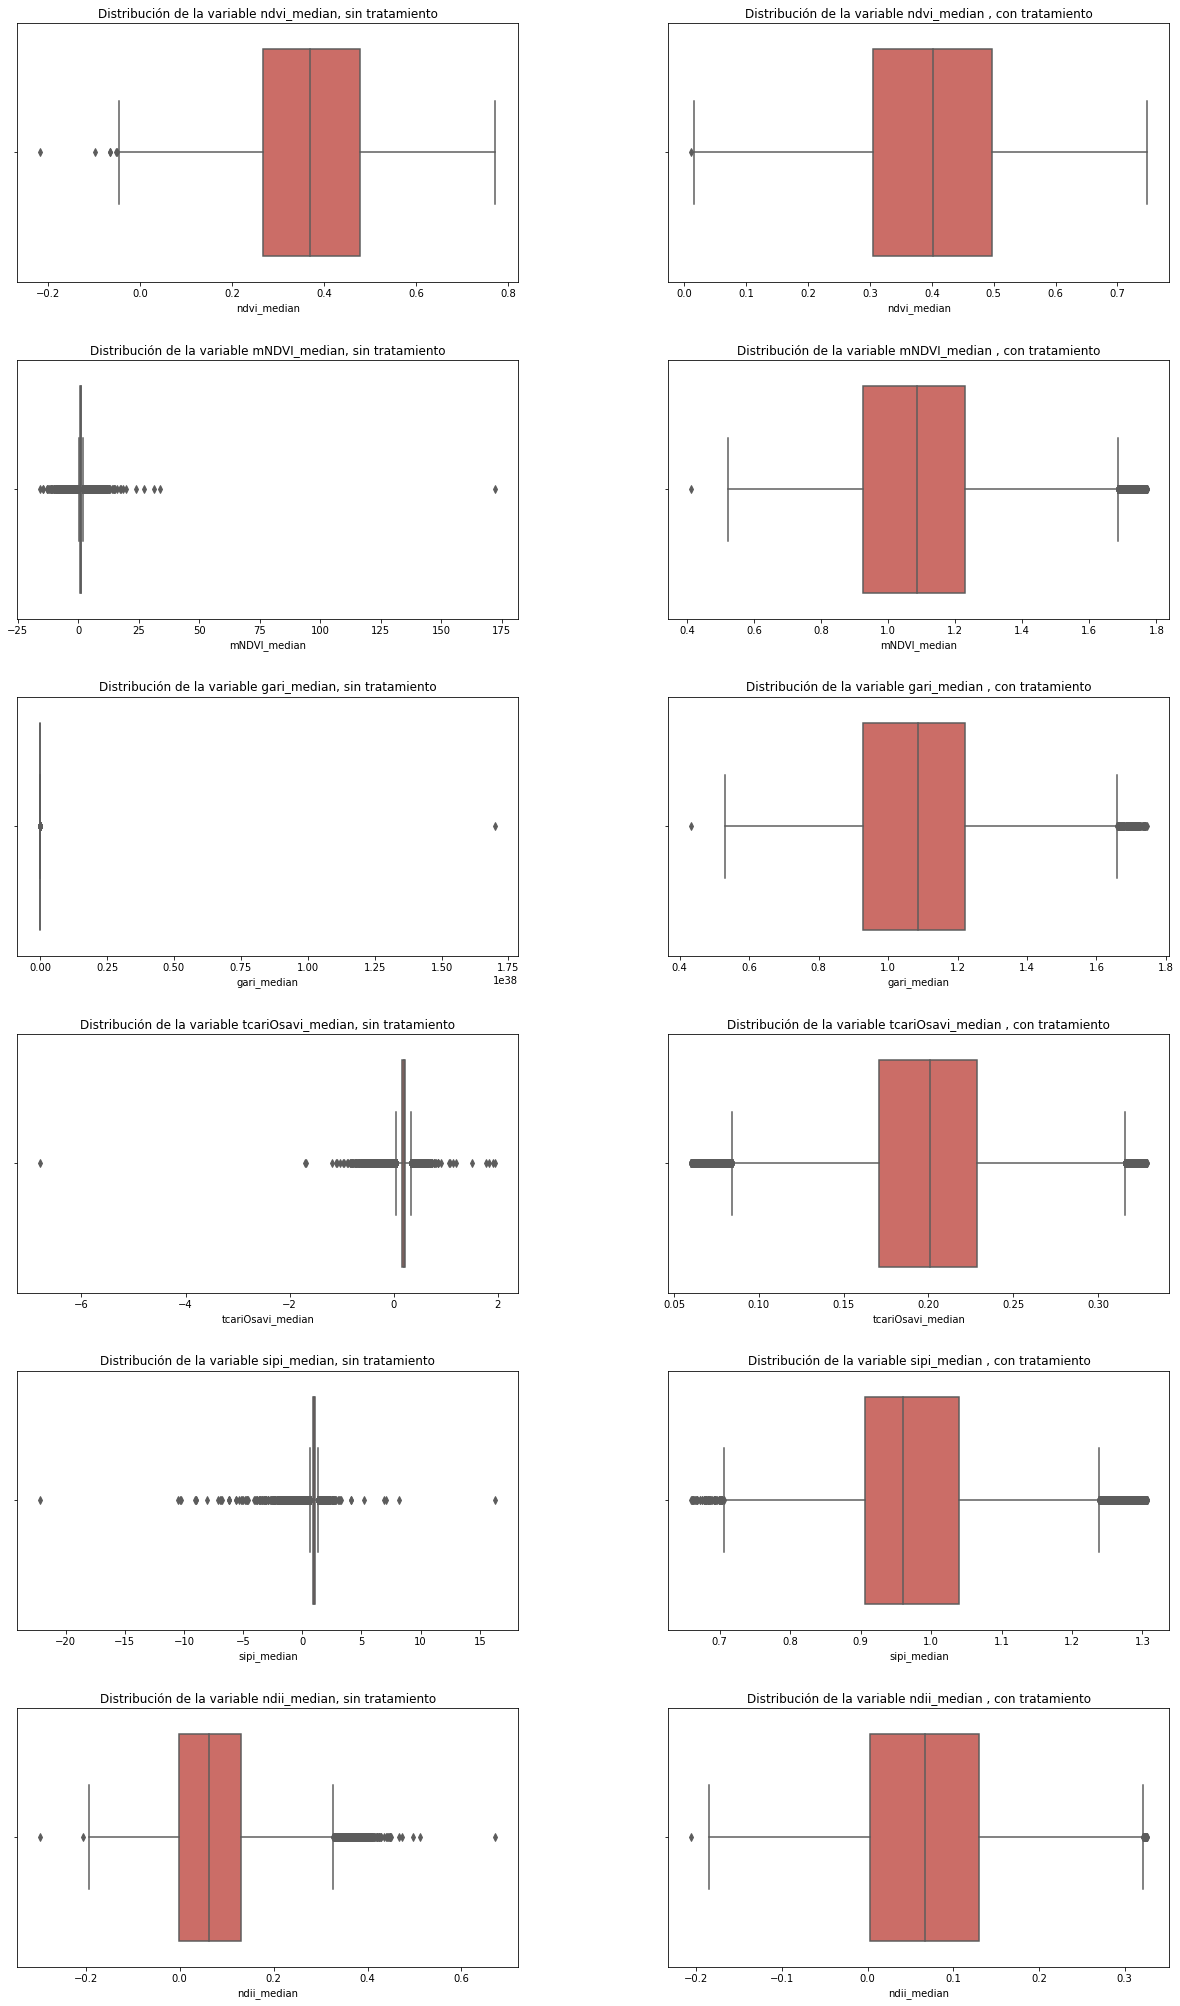

In [ ]:
#Boxplot para indices
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,30)) #ancho=20, alto=30

for index, col in enumerate(["ndvi_median", "mNDVI_median", "gari_median","tcariOsavi_median", "sipi_median", 
                "ndii_median"]):
  axes[index][0].set_title(f"Distribución de la variable {col}, sin tratamiento")
  sns.boxplot(data=df_A,  x=df_A[col], palette="hls", ax=axes[index][0])

  
  axes[index][1].set_title(f"Distribución de la variable {col} , con tratamiento")
  sns.boxplot(data=df_A_final,  x=df_A_final[col], palette="hls", ax=axes[index][1])
 


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.3)
plt.show()

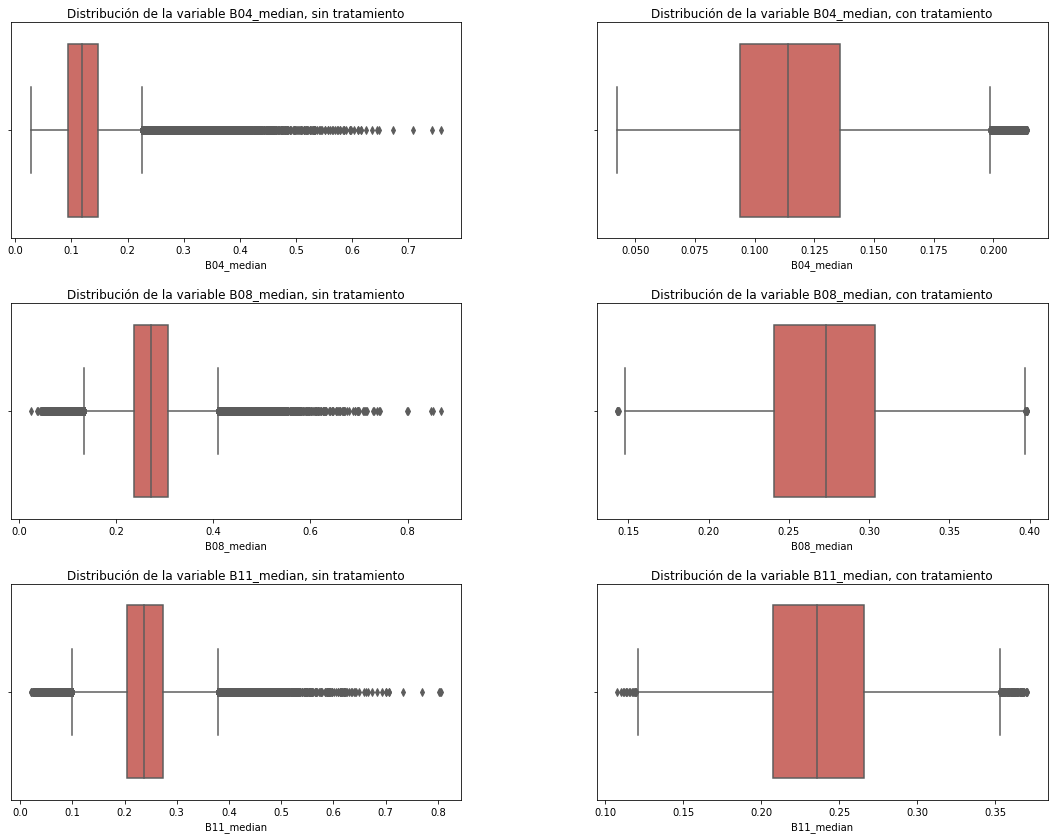

In [ ]:
#Boxplot para bandas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,12)) #ancho=10, alto=10

for index, col in enumerate(["B04_median", "B08_median", "B11_median"]):
  axes[index][0].set_title(f"Distribución de la variable {col}, sin tratamiento")
  sns.boxplot(data=df_A,  x=df_A[col], palette="hls", ax=axes[index][0])

  
  axes[index][1].set_title(f"Distribución de la variable {col}, con tratamiento")
  sns.boxplot(data=df_A_final, x=df_A_final[col], palette="hls", ax=axes[index][1])
 


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.3)
plt.show()

##[B] Imputacion General + Filtrado Por Nubosidad 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)
- Remoción de Outliers (a nivel general sin considerar estacionalidad)
- Imputar valores nulos (definir el criterio, o estadistico, _media_, _mediana_, etc)
- Filtrar por nubosidad < 10%
- Grabar los datos transformados

In [ ]:
df_B=df_initio.copy()

In [ ]:
df_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208932 entries, 0 to 208931
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ndvi_median        167260 non-null  float64
 1   mNDVI_median       167260 non-null  float64
 2   gari_median        167260 non-null  float64
 3   tcariOsavi_median  167260 non-null  float64
 4   sipi_median        167260 non-null  float64
 5   ndii_median        167260 non-null  float64
 6   B04_median         167263 non-null  float64
 7   B08_median         167263 non-null  float64
 8   B11_median         167262 non-null  float64
 9   raster             208932 non-null  object 
 10  clouds_on_raster   208932 non-null  float64
 11  area_m2            208932 non-null  float64
 12  date               208932 non-null  object 
 13  osm_id             208932 non-null  int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 23.9+ MB


In [ ]:
df_B.describe()

ndvi_median   mNDVI_median   gari_median  tcariOsavi_median  \
count  167260.000000  167260.000000  1.672600e+05      167260.000000   
mean        0.373979       1.085201  1.017226e+33           0.182268   
std         0.132312       0.812463  4.160192e+35           0.082500   
min        -0.217929     -15.764715 -3.473328e+01          -6.793653   
25%         0.267362       0.880755  8.934892e-01           0.154415   
50%         0.369258       1.079537  1.084467e+00           0.193955   
75%         0.478579       1.252952  1.249073e+00           0.224973   
max         0.772912     172.330429  1.701412e+38           1.954518   

         sipi_median    ndii_median     B04_median     B08_median  \
count  167260.000000  167260.000000  167263.000000  167263.000000   
mean        0.969624       0.067789       0.125373       0.271873   
std         0.253205       0.088415       0.045794       0.055516   
min       -22.149998      -0.297335       0.028200       0.024750   
25%         0.891668      -0.002238       0.094500       0.237100   
50%         0.956522       0.063278       0.118050       0.272500   
75%         1.054187       0.129625       0.146800       0.305900   
max        16.321413       0.672468       0.758600       0.868800   

          B11_median  clouds_on_raster       area_m2        osm_id  
count  167262.000000     208932.000000  2.089320e+05  2.089320e+05  
mean        0.238991         19.473638  1.249388e+04  4.343631e+08  
std         0.057024         33.424013  7.895730e+04  2.141069e+08  
min         0.021300          0.000000  4.225951e+02  1.331006e+06  
25%         0.204150          0.000000  2.066559e+03  2.867065e+08  
50%         0.238100          0.000000  3.812182e+03  3.596742e+08  
75%         0.274000         25.009939  6.644794e+03  6.059767e+08  
max         0.806100        100.000000  1.370630e+06  9.249657e+08

**Remoción de outliers**

Contador de outliers para el DataFrame en la instancia: sin filtrado por máscara de nubes ni eliminación de valores faltantes.

In [ ]:
for i in INDICES_BANDAS:
  print(f"La columna {i} tiene {count_outliers(df_B, i)} outliers.")

La columna ndvi_median tiene 6 outliers.
La columna mNDVI_median tiene 11178 outliers.
La columna gari_median tiene 8769 outliers.
La columna tcariOsavi_median tiene 10865 outliers.
La columna sipi_median tiene 13734 outliers.
La columna ndii_median tiene 485 outliers.
La columna B04_median tiene 4827 outliers.
La columna B08_median tiene 4006 outliers.
La columna B11_median tiene 4131 outliers.


In [ ]:
# Limpieza de outliers
df_B_clear= CustomSampler_IQR(df_B, INDICES_BANDAS)

**Resumen de outliers receta B**

Contador de outliers para el DataFrame en la instancia: sin filtrado por máscara de nubes ni eliminación de valores faltantes, con limpieza de outliers.

In [ ]:
for i in INDICES_BANDAS:
  print(f"La columna {i} tiene {count_outliers(df_B_clear, i)} outliers.")

La columna ndvi_median tiene 0 outliers.
La columna mNDVI_median tiene 1887 outliers.
La columna gari_median tiene 281 outliers.
La columna tcariOsavi_median tiene 3726 outliers.
La columna sipi_median tiene 3396 outliers.
La columna ndii_median tiene 30 outliers.
La columna B04_median tiene 1111 outliers.
La columna B08_median tiene 137 outliers.
La columna B11_median tiene 294 outliers.


In [ ]:
contador_IQR_B= 0
for i in INDICES_BANDAS:
  contador_IQR_B += count_outliers(df_B, i)

In [ ]:
contador_IQR_B_clear= 0
for i in INDICES_BANDAS:
  contador_IQR_B_clear += count_outliers(df_B_clear, i)

In [ ]:
#Resumen:
print(f"El dataset de la receta B, sin filtrado por nubosidad y con valores faltantes, tiene {contador_IQR_B} outliers.")

print(f"El dataset de la receta B, luego del tratamiento de outliers, tiene {contador_IQR_B_clear} outliers.")

El dataset de la receta B, sin filtrado por nubosidad y con valores faltantes, tiene 58001 outliers.
El dataset de la receta B, luego del tratamiento de outliers, tiene 10862 outliers.


**Imputación de valores faltantes**



Veamos cúantos valores faltantes presenta cada variable en estudio.

In [ ]:
#Dataset original
df_B.isna().sum()

ndvi_median          41672
mNDVI_median         41672
gari_median          41672
tcariOsavi_median    41672
sipi_median          41672
ndii_median          41672
B04_median           41669
B08_median           41669
B11_median           41670
raster                   0
clouds_on_raster         0
area_m2                  0
date                     0
osm_id                   0
dtype: int64

In [ ]:
#Dataset con limpieza de valores atípicos
df_B_clear.isna().sum()

ndvi_median          41671
mNDVI_median         41671
gari_median          41671
tcariOsavi_median    41671
sipi_median          41671
ndii_median          41671
B04_median           41668
B08_median           41669
B11_median           41669
raster                   0
clouds_on_raster         0
area_m2                  0
date                     0
osm_id                   0
dtype: int64

In [ ]:
# df_B_clear.isnull().values.any()

In [ ]:
df_B_clear.describe()

ndvi_median   mNDVI_median    gari_median  tcariOsavi_median  \
count  138021.000000  138021.000000  138021.000000      138021.000000   
mean        0.399780       1.100434       1.089855           0.195873   
std         0.120146       0.236738       0.217205           0.049371   
min         0.011418       0.408949       0.433145           0.048595   
25%         0.299621       0.933144       0.935556           0.168000   
50%         0.396182       1.094726       1.093333           0.199149   
75%         0.494710       1.241693       1.231959           0.227054   
max         0.747038       1.811232       1.781766           0.330783   

         sipi_median    ndii_median     B04_median     B08_median  \
count  138021.000000  138021.000000  138024.000000  138023.000000   
mean        0.974899       0.072921       0.118023       0.275270   
std         0.107370       0.083480       0.030605       0.044034   
min         0.648241      -0.185634       0.042400       0.136400   
25%         0.901719       0.005974       0.094900       0.242250   
50%         0.955953       0.069858       0.115500       0.274900   
75%         1.034917       0.133109       0.138600       0.306600   
max         1.297948       0.327246       0.225200       0.409100   

          B11_median  clouds_on_raster       area_m2        osm_id  
count  138023.000000     179692.000000  1.796920e+05  1.796920e+05  
mean        0.237839         20.511862  1.298943e+04  4.326414e+08  
std         0.041802         35.017709  8.062478e+04  2.122519e+08  
min         0.099750          0.000000  4.225951e+02  1.331006e+06  
25%         0.207700          0.000000  2.116144e+03  2.867065e+08  
50%         0.236500          0.000000  3.907756e+03  3.592638e+08  
75%         0.267100         25.603451  6.760726e+03  6.059767e+08  
max         0.378600        100.000000  1.370630e+06  9.249657e+08

Para decidir con qué valor vamos a imputar los datos faltantes de cada variable contenida en INDICES_BANDAS, podemos observar en el "describe" que los valores de la media y la mediana están muy próximos. Este comportamiento se debe a que, al hacer una limpieza de outliers, la distribución de las variables comienzan a comportarse de manera más simétrica. 

Debido a ésto,  podemos optar por la media como valor representativo de la muestra y utilizarlo para la imputación de NaNs. 

In [ ]:
#Correr si queremos saber en qué posición se encuentran los NaN
# nan_rows = df_B_clear[df_B_clear.isnull().any(1)]
# nan_rows.head(5)

A continuación mostramos los boxplot de las variables luego de realizarles la limpieza de outliers.

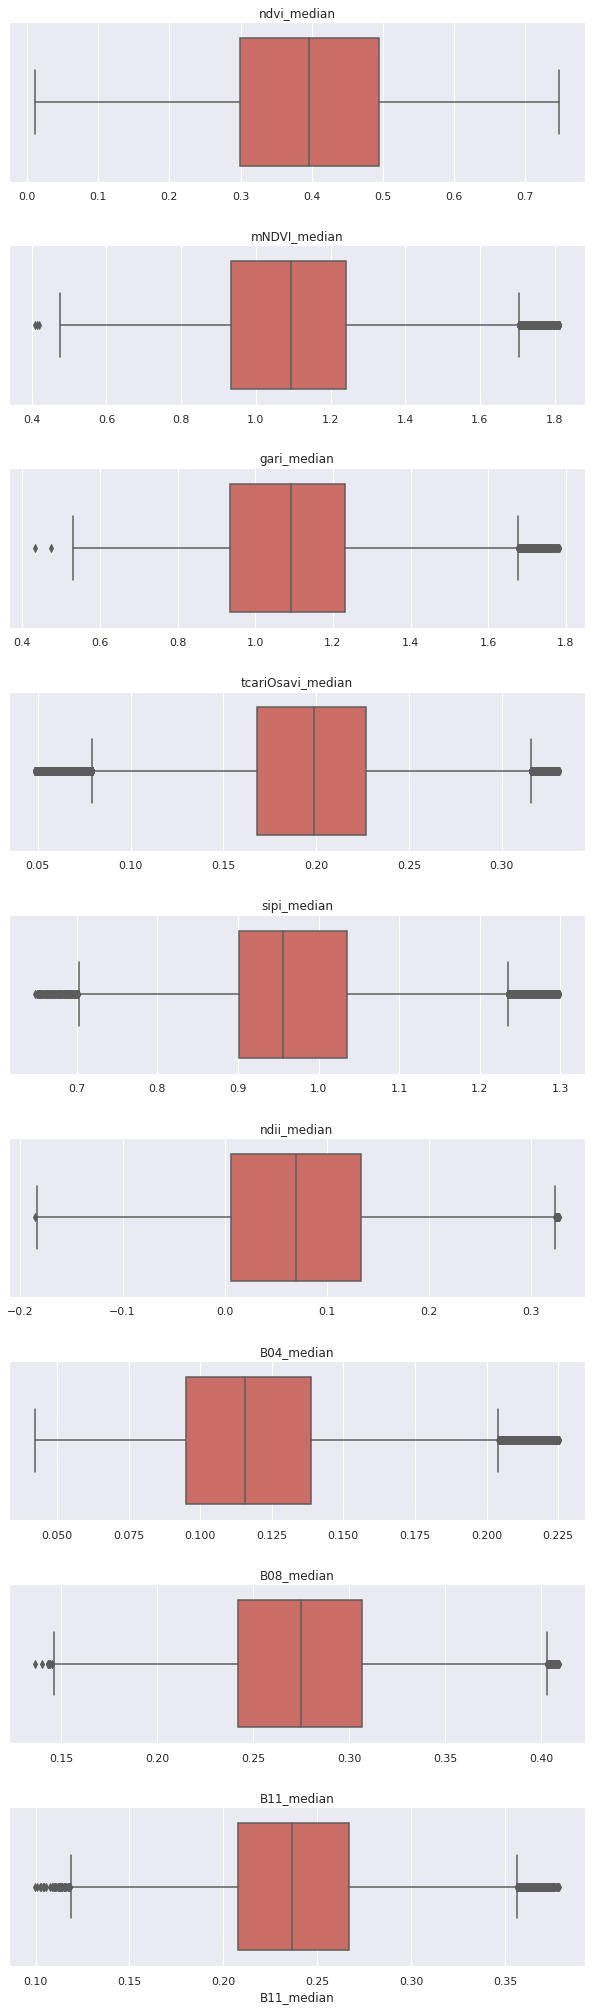

In [ ]:
fig, ejes = plt.subplots(9, 1, figsize=(10, 30))
for nombre, eje in zip(INDICES_BANDAS, ejes):
    sns.boxplot(data=df_B_clear, x=df_B_clear[nombre], ax=eje, palette="hls")
    eje.set_title(nombre)
   
    if eje != ejes[-1]:
        eje.set_xlabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Imputamos cada variable con su media ya que las distribuciones parecen ser, en general, aproximadamente simétricas.

In [ ]:
df_B_imput= df_B_clear.copy()
df_B_imput.fillna(df_B_imput[INDICES_BANDAS].median(), inplace=True)
df_B_imput.isna().sum()


ndvi_median          0
mNDVI_median         0
gari_median          0
tcariOsavi_median    0
sipi_median          0
ndii_median          0
B04_median           0
B08_median           0
B11_median           0
raster               0
clouds_on_raster     0
area_m2              0
date                 0
osm_id               0
dtype: int64

**Filtrar por nubosidad**

In [ ]:
mask_clouds_B= df_B_imput['clouds_on_raster'] < 10
df_B_clouds= df_B_imput[mask_clouds_B]
#df_B_clouds.reset_index(drop=True)

In [ ]:
# df_B_clouds.info()

In [ ]:
df_B_final= df_B_clouds

A continuación mostramos los boxplot de cada variable antes y después del tratamiento de valores faltantes y outliers para comparar las distribuciones.

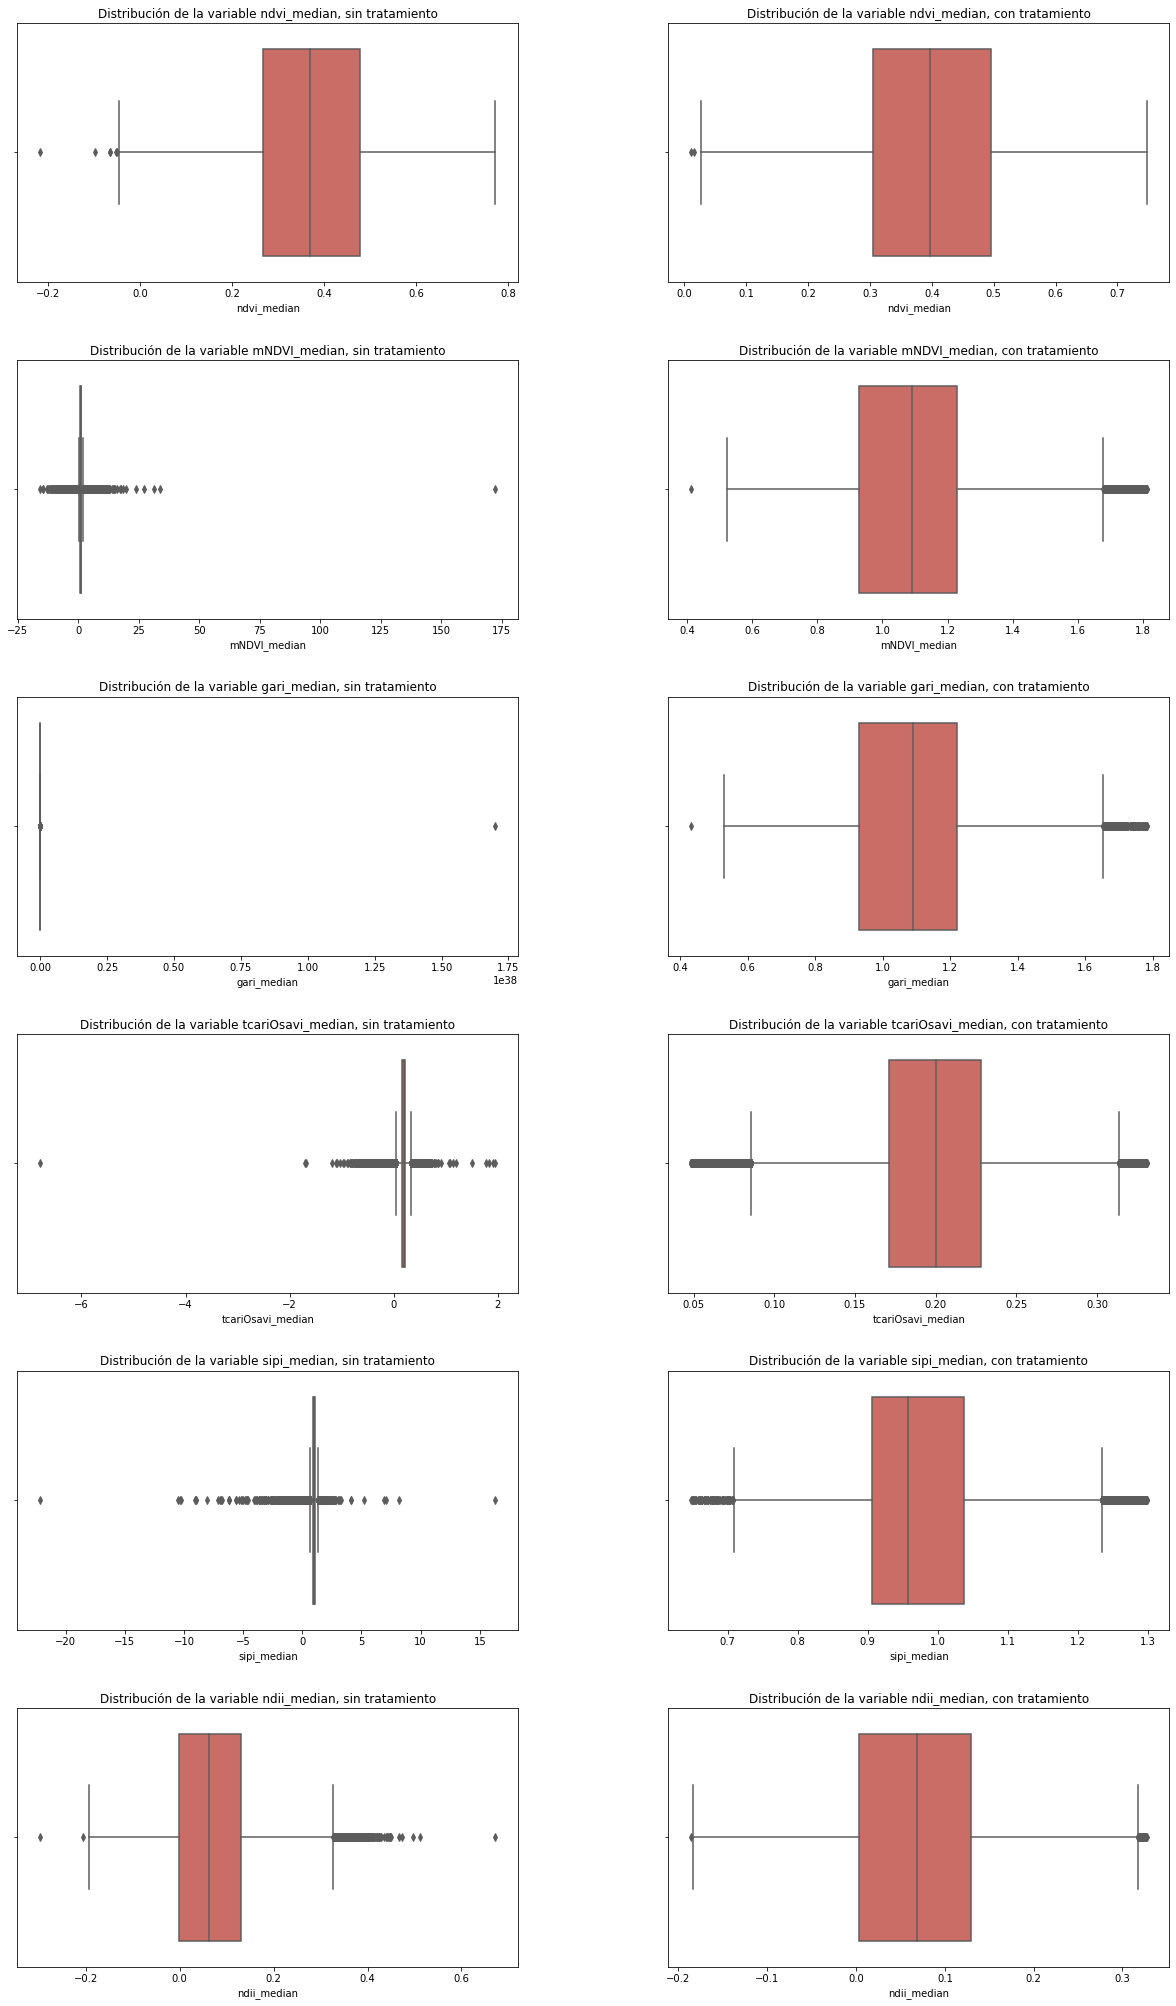

In [ ]:
#Boxplot para indices
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,30)) #ancho=20, alto=30

for index, col in enumerate(["ndvi_median", "mNDVI_median", "gari_median","tcariOsavi_median", "sipi_median", 
                "ndii_median"]):
  axes[index][0].set_title(f"Distribución de la variable {col}, sin tratamiento")
  sns.boxplot(data=df_B,  x=df_B[col], palette="hls", ax=axes[index][0])

  
  axes[index][1].set_title(f"Distribución de la variable {col}, con tratamiento")
  sns.boxplot(data=df_B_final,  x=df_B_final[col], palette="hls", ax=axes[index][1])
 


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.3)
plt.show()

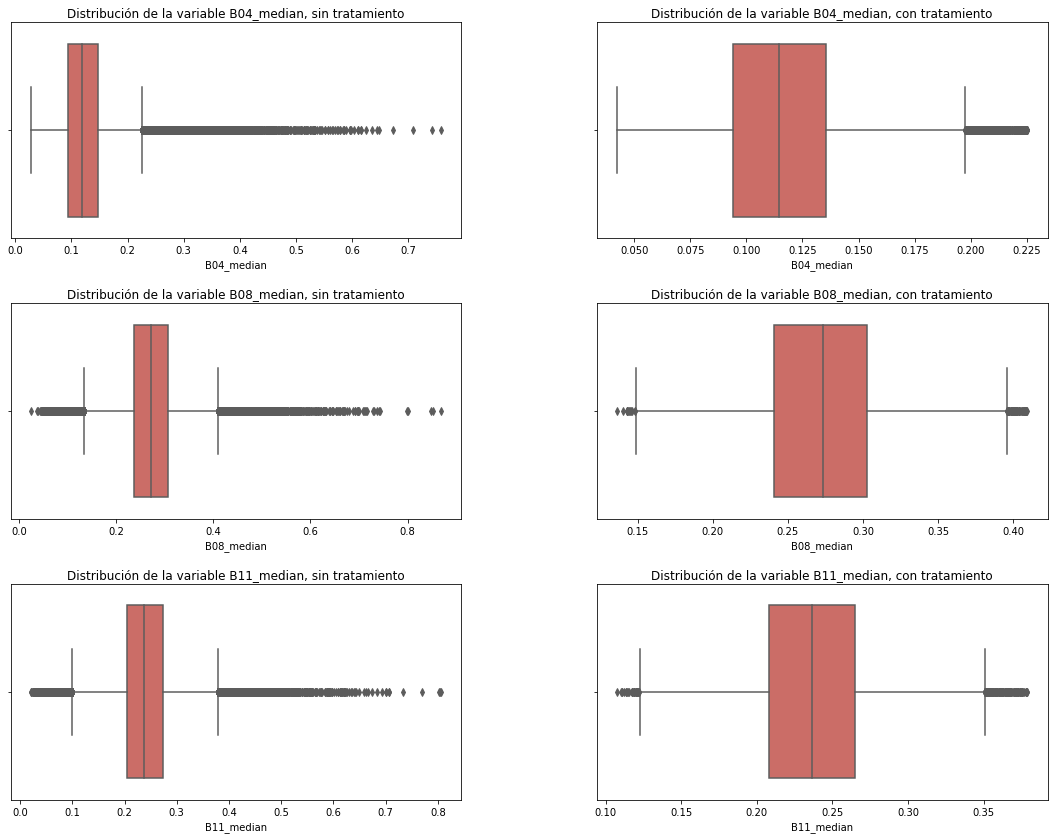

In [ ]:
#Boxplot para bandas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,12)) #ancho=10, alto=10

for index, col in enumerate(["B04_median", "B08_median", "B11_median"]):
  axes[index][0].set_title(f"Distribución de la variable {col}, sin tratamiento")
  sns.boxplot(data=df_B,  x=df_B[col], palette="hls", ax=axes[index][0])

  
  axes[index][1].set_title(f"Distribución de la variable {col}, con tratamiento")
  sns.boxplot(data=df_B_final, x=df_B_final[col], palette="hls", ax=axes[index][1])
 


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.3)
plt.show()

##[C] Imputacion Estacional + Filtrado Por Nubosidad 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)
- Remoción de Outliers (a nivel estacional - SIN refinar por año)
- Imputar valores nulos (a nivel estacional - definir el criterio, o estadistico, _media_, _mediana_, etc)
- Filtrar por nubosidad:
    - < 20%
    - < 40%
- Grabar los datos transformados

In [ ]:
df_C= df_initio.copy()

In [ ]:
df_C.describe()

ndvi_median   mNDVI_median   gari_median  tcariOsavi_median  \
count  167260.000000  167260.000000  1.672600e+05      167260.000000   
mean        0.373979       1.085201  1.017226e+33           0.182268   
std         0.132312       0.812463  4.160192e+35           0.082500   
min        -0.217929     -15.764715 -3.473328e+01          -6.793653   
25%         0.267362       0.880755  8.934892e-01           0.154415   
50%         0.369258       1.079537  1.084467e+00           0.193955   
75%         0.478579       1.252952  1.249073e+00           0.224973   
max         0.772912     172.330429  1.701412e+38           1.954518   

         sipi_median    ndii_median     B04_median     B08_median  \
count  167260.000000  167260.000000  167263.000000  167263.000000   
mean        0.969624       0.067789       0.125373       0.271873   
std         0.253205       0.088415       0.045794       0.055516   
min       -22.149998      -0.297335       0.028200       0.024750   
25%         0.891668      -0.002238       0.094500       0.237100   
50%         0.956522       0.063278       0.118050       0.272500   
75%         1.054187       0.129625       0.146800       0.305900   
max        16.321413       0.672468       0.758600       0.868800   

          B11_median  clouds_on_raster       area_m2        osm_id  
count  167262.000000     208932.000000  2.089320e+05  2.089320e+05  
mean        0.238991         19.473638  1.249388e+04  4.343631e+08  
std         0.057024         33.424013  7.895730e+04  2.141069e+08  
min         0.021300          0.000000  4.225951e+02  1.331006e+06  
25%         0.204150          0.000000  2.066559e+03  2.867065e+08  
50%         0.238100          0.000000  3.812182e+03  3.596742e+08  
75%         0.274000         25.009939  6.644794e+03  6.059767e+08  
max         0.806100        100.000000  1.370630e+06  9.249657e+08

**Remoción de outliers**

En el trabajo práctico N°1 estudiamos la estacionalidad a partir del comportamiento de las variables durante las estaciones del año a lo largo del tiempo y observamos un patron de repetición aproximadamente constante. Ahora separaremos los datos según la estación del año a la que pertenece y utilizaremos la misma función empleada en el trabajo anterior para clasificar las observaciones por periodo: verano, otoño, invierno, primavera.

In [ ]:
df_C['date'] = pd.to_datetime(df_C.date, format='%Y/%m/%d')

In [ ]:
#le asignamos a cada fecha la estación del año correspondiente.
from datetime import date, datetime

def season_of_date(date):
    year = str(date.year)
    seasons = {'Otoño': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'Invierno': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'Primavera': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['Primavera']:
        return 'Primavera'
    if date in seasons['Invierno']:
        return 'Invierno'
    if date in seasons['Otoño']:
        return 'Otoño'
    else:
        return 'Verano'

# Assuming df has a date column of type `datetime`
df_C['estacion'] = df_C.date.map(season_of_date)

In [ ]:
df_C['estacion'].value_counts()

Verano       62074
Primavera    51476
Otoño        49205
Invierno     46177
Name: estacion, dtype: int64

In [ ]:
#filtros por estación
mask_v= df_C['estacion'] == 'Verano'
mask_o= df_C['estacion'] == 'Otoño'
mask_i= df_C['estacion'] == 'Invierno'
mask_p= df_C['estacion'] == 'Primavera'


* Boxplot por estación:

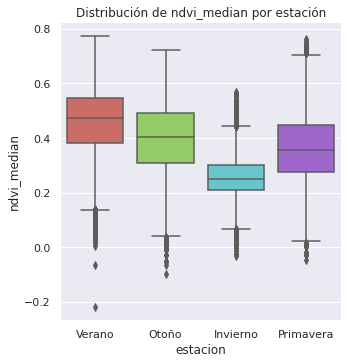

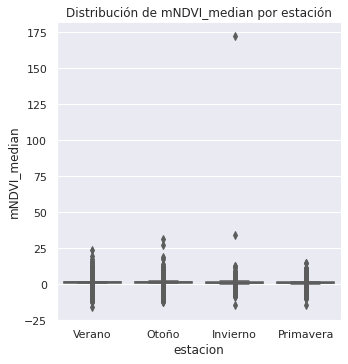

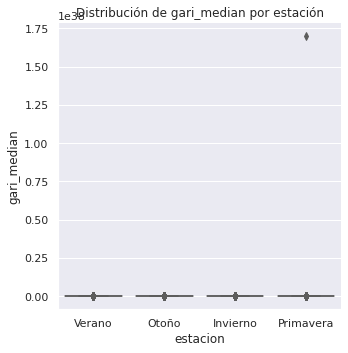

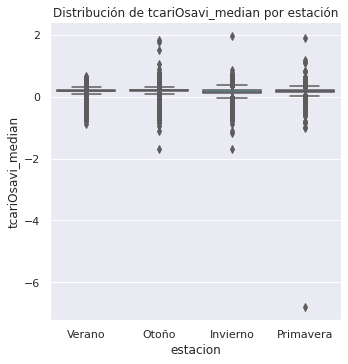

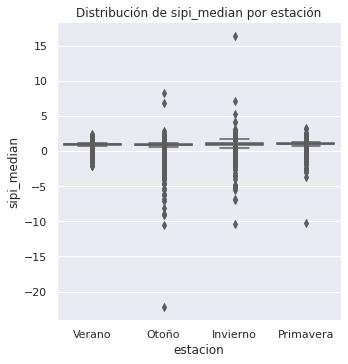

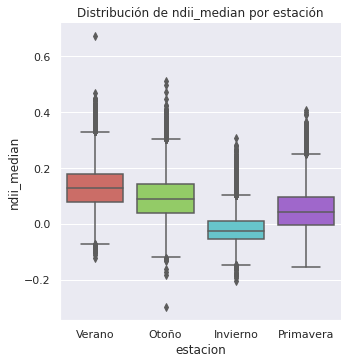

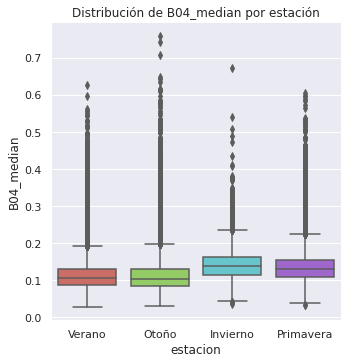

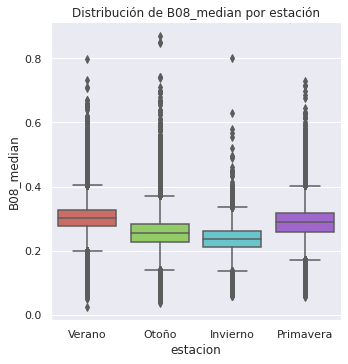

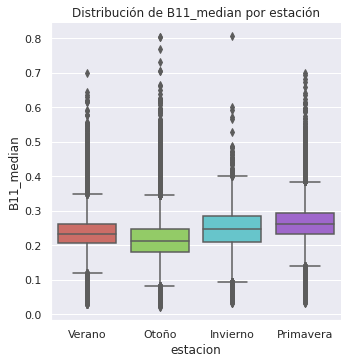

In [ ]:
sns.set(rc={'figure.figsize':(10, 5)})
BOX_PLOT= ["ndvi_median", "mNDVI_median", "gari_median","tcariOsavi_median", "sipi_median", 
                "ndii_median", "B04_median", "B08_median", "B11_median"]

for nombre in BOX_PLOT:
    sns.catplot(x = "estacion", y = nombre, data = df_C, kind = "box", palette="hls")
    eje.set_title(nombre)
    plt.title(f'Distribución de {nombre} por estación')
    

plt.show()
    

En los boxplots por estación se puede observar claramente que lo que se considera punto atípico para el ndii_median en invierno, no lo es en temporada de verano, sólo por citar una de las variables. Si analizamos el resto de los índices y bandas vamos a encontrar comportamientos parecidos en cuanto a outliers.

A continuación se presenta una tabla que nos ayudará a tomar dimensión de la importancia de considerar los outliers de forma diferenciada.

In [ ]:
outlier_verano=[]
outlier_otoño=[]
outlier_invierno=[]
outlier_primavera=[]
outlier_sin_estacion=[]

for i in INDICES_BANDAS:
  v=count_outliers(df_C[mask_v], i)
  outlier_verano.append(v)
  o=count_outliers(df_C[mask_o], i)
  outlier_otoño.append(o)
  i=count_outliers(df_C[mask_i], i)
  outlier_invierno.append(i)
  
for i in INDICES_BANDAS:
  p=count_outliers(df_C[mask_p], i)
  outlier_primavera.append(p)

for i in INDICES_BANDAS:
  t= count_outliers(df_initio, i)
  outlier_sin_estacion.append(t) #este dataset no incluye máscara de nubes ni imputación de datos faltantes
 

In [ ]:
#Creamos la tabla
filas=['outlier_no_diferenciado', 'outlier_verano', 'outlier_otoño', 'outlier_invierno', 'outlier_primavera']
columnas= [INDICES_BANDAS]
datos= [outlier_sin_estacion, outlier_verano, outlier_otoño, outlier_invierno, outlier_primavera]
resumen_outlier = pd.DataFrame(datos, columns=columnas, index=filas)
resumen_outlier 

ndvi_median mNDVI_median gari_median  \
outlier_no_diferenciado           6        11178        8769   
outlier_verano                  454         2949        2951   
outlier_otoño                    40         3624        2932   
outlier_invierno                583         2289        1559   
outlier_primavera                38         1873        1811   

                        tcariOsavi_median sipi_median ndii_median B04_median  \
outlier_no_diferenciado             10865       13734         485       4827   
outlier_verano                       2633        3967         343       2567   
outlier_otoño                        2975        3947         235       2179   
outlier_invierno                     1475         821        1080        374   
outlier_primavera                    2276        2895         237       1545   

                        B08_median B11_median  
outlier_no_diferenciado       4006       4131  
outlier_verano                2446       1839  
outlier_otoño                 1839       1630  
outlier_invierno               687        275  
outlier_primavera             1410       1395

A continuación removemos outliers por estación.

In [ ]:
def clear_df_outliers (df , colums):
 
  """df es una lista de DataFrames y 
     colum es una lista de features"""
  
  df_final=[]

  for data in df:
     data = CustomSampler_IQR(data, colums)
     df_final.append(data)
  
  return pd.concat(df_final, axis=0, ignore_index= True)
  

In [ ]:
df_C_list=[df_C[mask_v], df_C[mask_o], df_C[mask_i], df_C[mask_p]]

df_C_clear= clear_df_outliers(df_C_list, INDICES_BANDAS)


In [ ]:
df_C_clear.sample(5)

ndvi_median  mNDVI_median  gari_median  tcariOsavi_median  \
12121      0.524128      1.205392     1.195153           0.170718   
165617     0.268447      0.775940     0.780562           0.170306   
126159     0.190856      0.556038     0.545528           0.100740   
173630     0.301736      0.714173     0.702189           0.172607   
114530          NaN           NaN          NaN                NaN   

        sipi_median  ndii_median  B04_median  B08_median  B11_median  \
12121       0.91497     0.073079     0.08215     0.26865     0.23245   
165617      1.14438    -0.038439     0.14595     0.25565     0.27635   
126159      1.39929    -0.056319     0.19605     0.28960     0.32825   
173630      1.20014    -0.014103     0.16455     0.30195     0.30710   
114530          NaN          NaN         NaN         NaN         NaN   

                                                   raster  clouds_on_raster  \
12121   S2A_MSIL1C_20180309T142031_N0206_R010_T20JLL_2...               0.0   
165617  S2B_MSIL1C_20201029T141739_N0209_R010_T20JLL_2...               0.0   
126159  S2A_MSIL1C_20200914T141741_N0209_R010_T20JLL_2...               0.0   
173630  S2B_MSIL1C_20211014T141739_N0301_R010_T20JLL_2...               0.0   
114530  S2B_MSIL1C_20190816T142049_N0208_R010_T20JLL_2...             100.0   

            area_m2       date     osm_id   estacion  
12121   2614.751478 2018-03-09  235921043     Verano  
165617  4615.908067 2020-10-29  353543437  Primavera  
126159  4363.730558 2020-09-14  793714974   Invierno  
173630  6940.507640 2021-10-14  559328111  Primavera  
114530  7500.441870 2019-08-16  154644515   Invierno

In [ ]:
print(f"La cantidad original de registros de la receta C es: {df_C.shape[0]}")
print(f"La cantidad de registros de la receta C, luego del tratamiento de outliers es: {df_C_clear.shape[0]}")
print(f"La cantidad de registros de la receta B, luego del tratamiento de outliers es: {df_B_clear.shape[0]}")

La cantidad original de registros de la receta C es: 208932
La cantidad de registros de la receta C, luego del tratamiento de outliers es: 181776
La cantidad de registros de la receta B, luego del tratamiento de outliers es: 179692


Notemos que la cantidad de datos en el DataFrame de la receta C luego de eliminar los outliers por estación es  mayor que la cantidad que conserva la receta B.

**Resumen de outliers receta C**

In [ ]:
contador_IQR_C= 0
for i in INDICES_BANDAS:
  contador_IQR_C += count_outliers(df_C, i)

contador_IQR_C_clear_estacion= 0
for i in INDICES_BANDAS:
  contador_IQR_C_clear_estacion += count_outliers(df_C_clear, i)

In [ ]:
#Resumen:
print(f"El dataset original de la receta C tiene {contador_IQR_C} outliers.")

print(f"El dataset de la receta C luego del tratamiento de outliers por estacion tiene {contador_IQR_C_clear_estacion} outliers.")

El dataset original de la receta C tiene 58001 outliers.
El dataset de la receta C luego del tratamiento de outliers por estacion tiene 18962 outliers.


A continuacion mostramos los boxplot antes y después del procesamiento de valores atípicos para la receta en cuestión. 

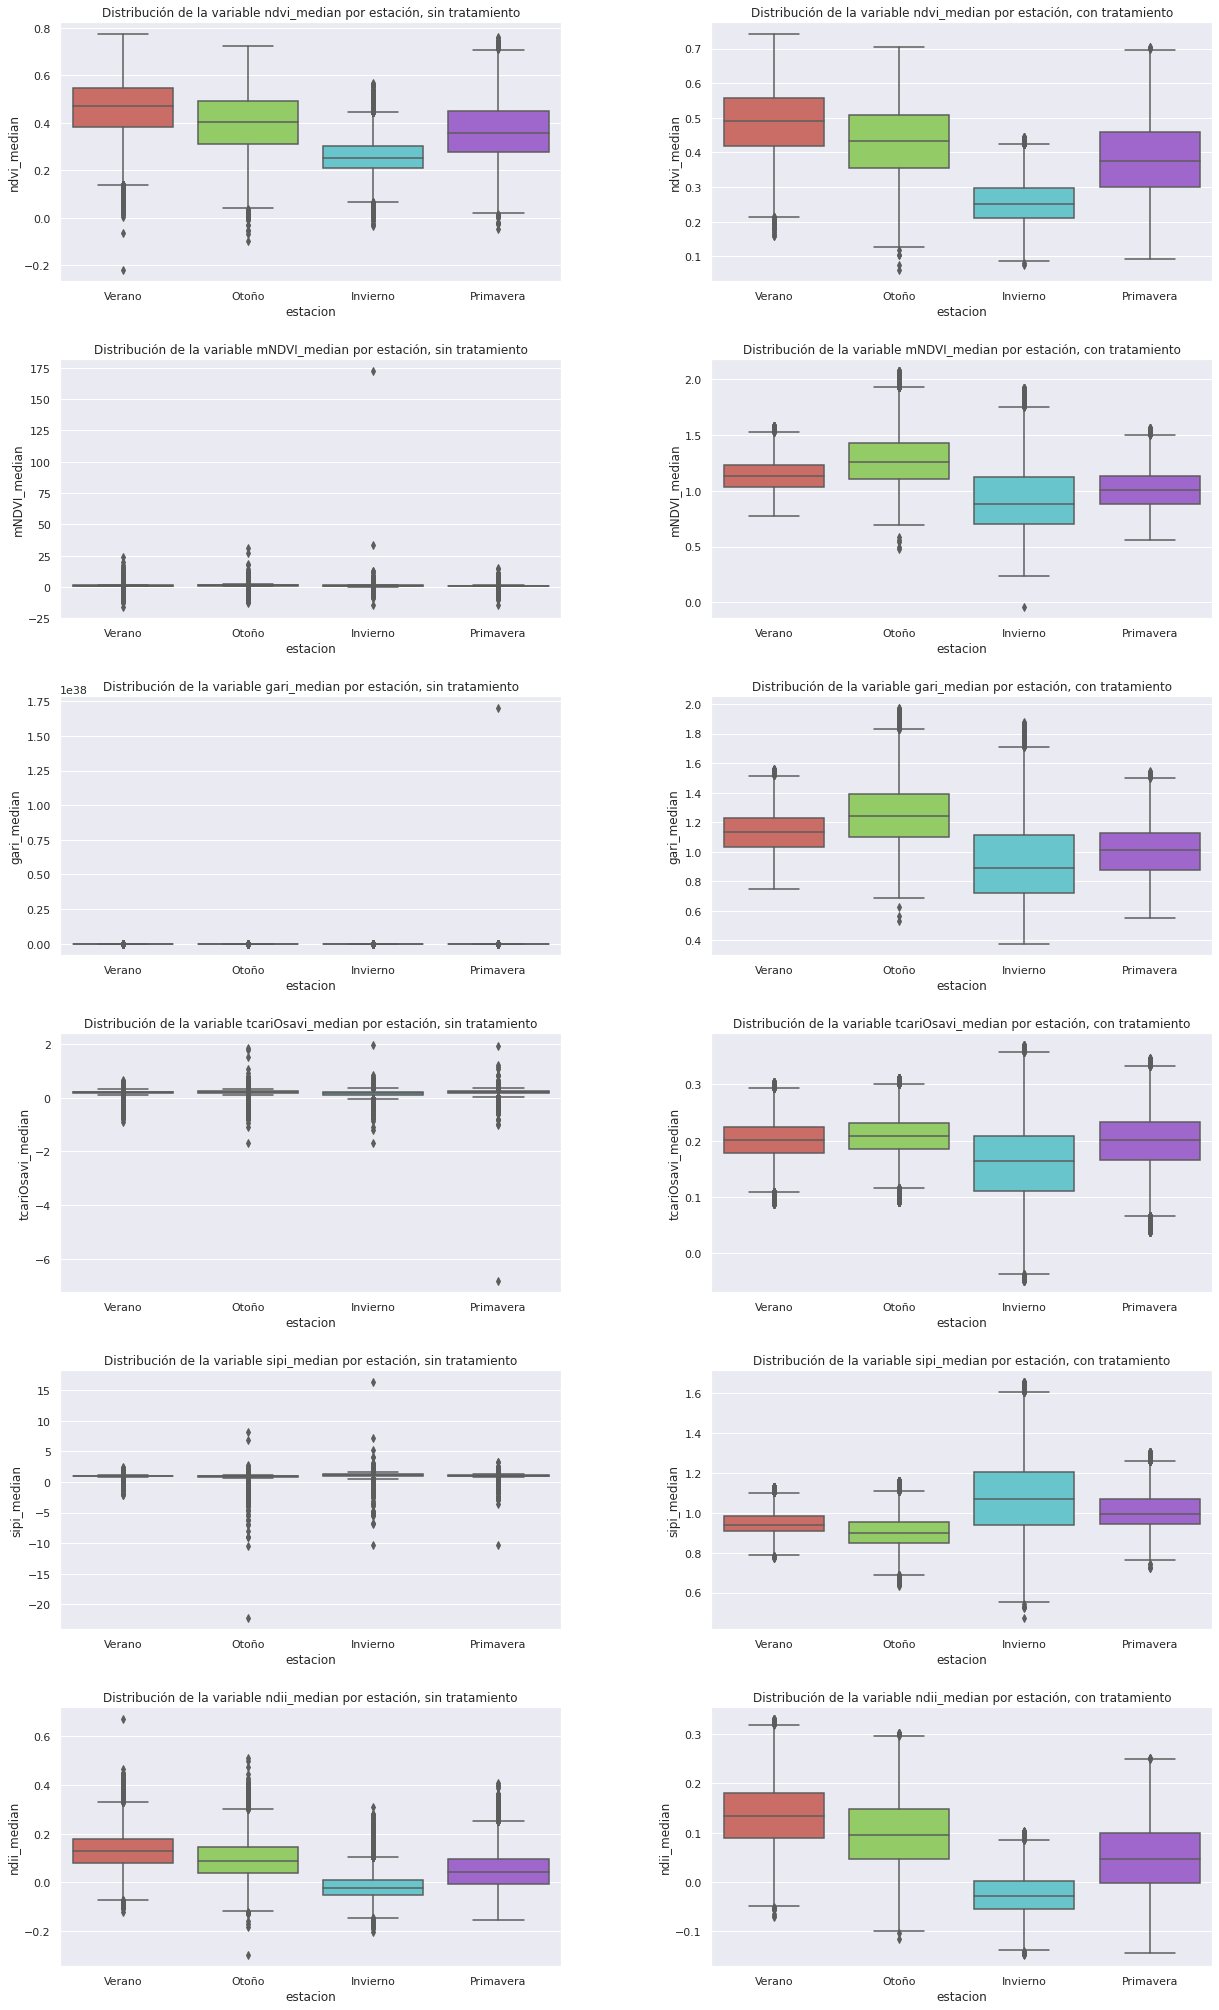

In [ ]:
#Boxplot para indices
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,30)) #ancho=20, alto=30

for index, col in enumerate(["ndvi_median", "mNDVI_median", "gari_median","tcariOsavi_median", "sipi_median", 
                "ndii_median"]):
  axes[index][0].set_title(f"Distribución de la variable {col} por estación, sin tratamiento")
  sns.boxplot(data=df_C, x='estacion', y=col, palette="hls", ax=axes[index][0])

  
  axes[index][1].set_title(f"Distribución de la variable {col} por estación, con tratamiento")
  sns.boxplot(data=df_C_clear, x='estacion', y=col, palette="hls", ax=axes[index][1])
 


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.3)
plt.show()

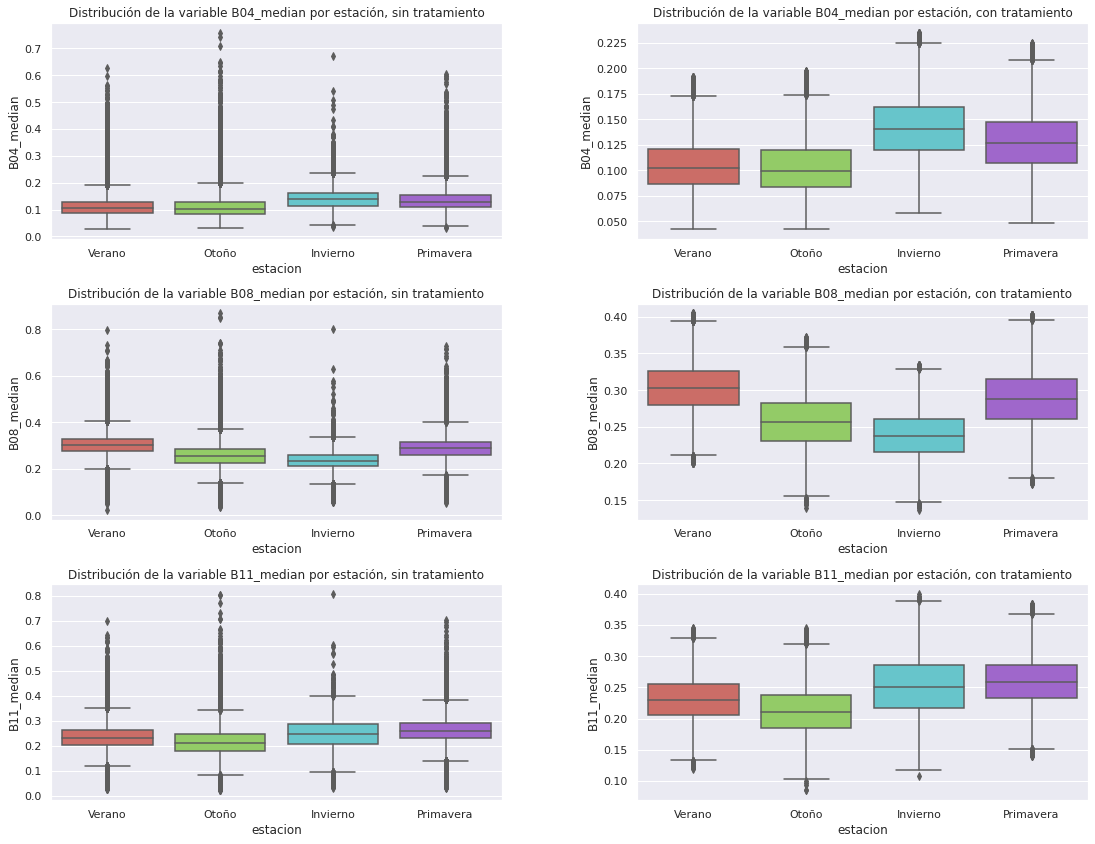

In [ ]:
#Boxplot para bandas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,12)) #ancho=10, alto=10

for index, col in enumerate(["B04_median", "B08_median", "B11_median"]):
  axes[index][0].set_title(f"Distribución de la variable {col} por estación, sin tratamiento")
  sns.boxplot(data=df_C, x='estacion', y=col, palette="hls", ax=axes[index][0])

  
  axes[index][1].set_title(f"Distribución de la variable {col} por estación, con tratamiento")
  sns.boxplot(data=df_C_clear, x='estacion', y=col, palette="hls", ax=axes[index][1])
 


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.3)
plt.show()

**Imputación de valores faltantes**

Para esta instancia vamos a comparar la media y la mediana de cada índice y banda en estudio para observar el acercamiento entre estos estadísticos y decidir uno de ellos para la imputación.

In [ ]:
round(df_C_clear[['estacion']+INDICES_BANDAS].groupby(by='estacion').agg([np.mean, np.median]), 3)

ndvi_median        mNDVI_median        gari_median         \
                 mean median         mean median        mean median   
estacion                                                              
Invierno        0.258  0.250        0.944  0.878       0.933  0.889   
Otoño           0.431  0.433        1.281  1.254       1.251  1.242   
Primavera       0.383  0.376        1.006  1.008       1.003  1.008   
Verano          0.487  0.492        1.131  1.135       1.127  1.135   

          tcariOsavi_median        sipi_median        ndii_median         \
                       mean median        mean median        mean median   
estacion                                                                   
Invierno              0.158  0.164       1.084  1.067      -0.025 -0.028   
Otoño                 0.207  0.208       0.905  0.898       0.098  0.096   
Primavera             0.198  0.201       1.013  0.996       0.051  0.046   
Verano                0.201  0.201       0.950  0.940       0.136  0.133   

          B04_median        B08_median        B11_median         
                mean median       mean median       mean median  
estacion                                                         
Invierno       0.142  0.140      0.238  0.237      0.252  0.250  
Otoño          0.103  0.100      0.258  0.256      0.212  0.210  
Primavera      0.128  0.126      0.288  0.288      0.260  0.259  
Verano         0.105  0.102      0.303  0.302      0.231  0.230

Vemos que en general la media y la mediana de las bandas por estación coinciden pero en el caso de los índices existe diferencia (no muy grande) entre ambos valores. Se puede optar por imputar los valores faltantes de los índices con la mediana según estación del año y en el caso de las bandas hacerlo por medio de la media de cada estación.

También se podría imputar directamente con la media tanto en índices como en bandas si se puede ser menos riguroso.

Las funciones imputacion_median_nan e imputacion_mean_nan nos facilitaran la imputación de valores faltantes según los criterios seleccionados.

In [ ]:
def imputacion_median_nan (df, colum):

  """df es una lista de DataFrames y 
     colum es una lista de features"""

  from sklearn.impute import SimpleImputer

  median_imputer= SimpleImputer(missing_values=np.nan, strategy='median') 

  df_final=[]

  for data in df:
   data.loc[:,colum] = median_imputer.fit_transform(data[colum])
   df_final.append(data[colum])
  
  return pd.concat(df_final, axis=0, ignore_index= True)

In [ ]:
def imputacion_mean_nan (df, colum):

  """df es una lista de DataFrame y 
     colum es una lista de features"""

  from sklearn.impute import SimpleImputer

  mean_imputer= SimpleImputer(missing_values=np.nan, strategy='mean') 

  df_final=[]

  for data in df:
   data.loc[:,colum] = mean_imputer.fit_transform(data[colum])
   df_final.append(data[colum])
  
  return pd.concat(df_final, axis=0, ignore_index= True)

In [ ]:
lista_df=[df_C_clear[df_C_clear['estacion'] == 'Verano'], df_C_clear[df_C_clear['estacion'] == 'Otoño'], 
          df_C_clear[df_C_clear['estacion'] == 'Invierno'],df_C_clear[df_C_clear['estacion'] == 'Primavera']]

BANDAS= ["B04_median", "B08_median", "B11_median"]

INDICES= ["ndvi_median", "mNDVI_median", "gari_median","tcariOsavi_median", "sipi_median", 
                "ndii_median"]


In [ ]:
C_nan_median= imputacion_median_nan(lista_df, INDICES)

C_nan_mean= imputacion_mean_nan(lista_df, BANDAS)

df_C_imput= pd.concat([C_nan_median, C_nan_mean, df_C_clear[add+['estacion']]], axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
df_C_imput.isnull().sum()

ndvi_median          0
mNDVI_median         0
gari_median          0
tcariOsavi_median    0
sipi_median          0
ndii_median          0
B04_median           0
B08_median           0
B11_median           0
raster               0
clouds_on_raster     0
area_m2              0
date                 0
osm_id               0
estacion             0
dtype: int64

* Filtrar por nubosidad




1.  Menor al 20%
2.  Menor al 40%





In [ ]:
mask_20= df_C_imput['clouds_on_raster'] < 20

mask_40= df_C_imput['clouds_on_raster'] < 40

df_C_20= df_C_imput[mask_20]

df_C_40= df_C_imput[mask_40]

In [ ]:
df_C_final_20= df_C_20

df_C_final_40= df_C_40

A continuación mostramos los boxplot de las distribuciones finales según el porcentaje de nubes ($<20\%$ y $<40\%$)

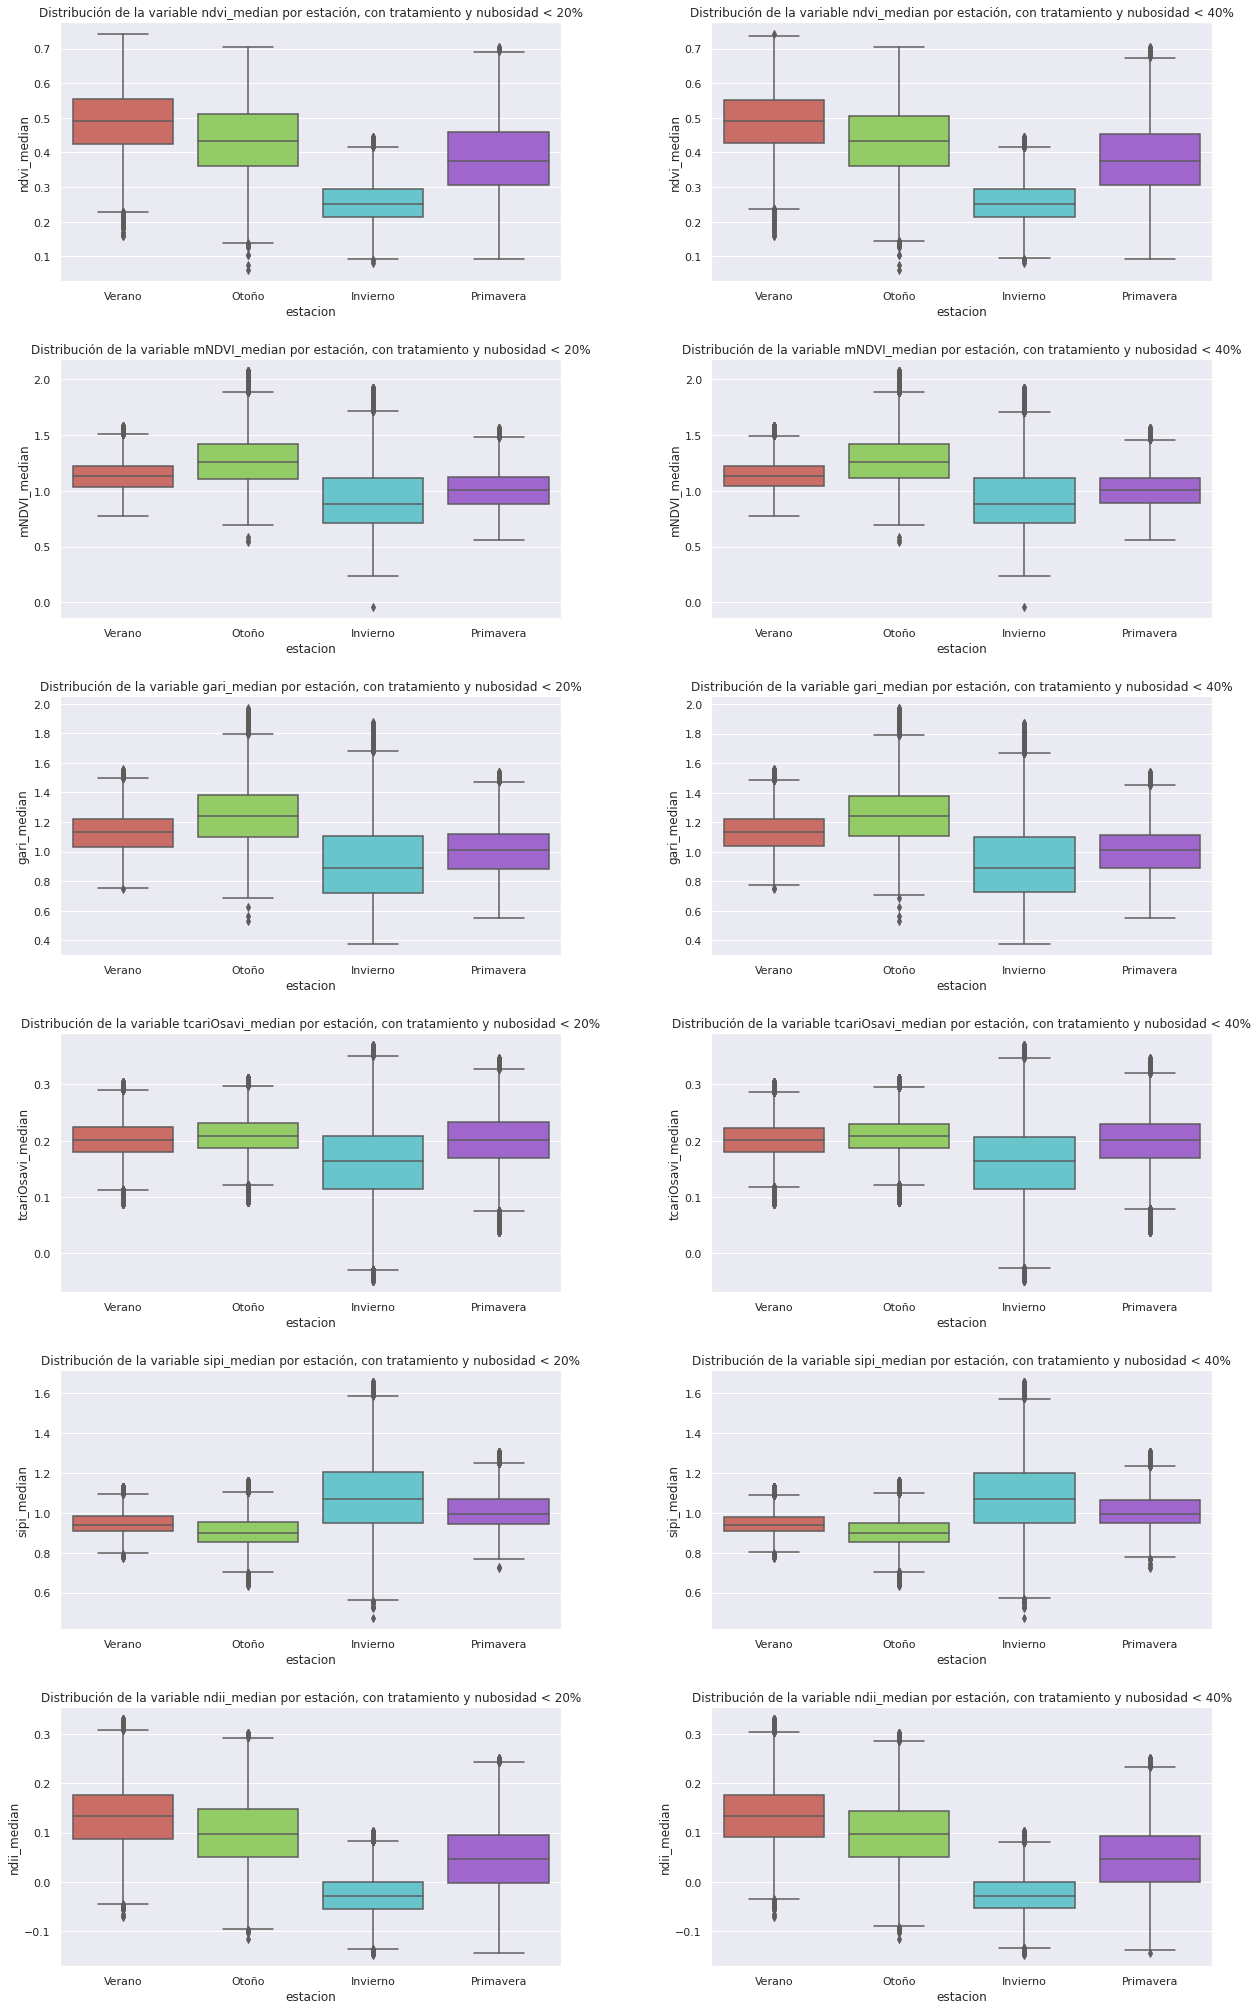

In [ ]:
#Boxplot para indices
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,30)) #ancho=20, alto=30

for index, col in enumerate(["ndvi_median", "mNDVI_median", "gari_median","tcariOsavi_median", "sipi_median", 
                "ndii_median"]):
  axes[index][0].set_title(f"Distribución de la variable {col} por estación, con tratamiento y nubosidad < 20%")
  sns.boxplot(data=df_C_final_20, x='estacion', y=col, palette="hls", ax=axes[index][0])

  
  axes[index][1].set_title(f"Distribución de la variable {col} por estación, con tratamiento y nubosidad < 40%")
  sns.boxplot(data=df_C_final_40, x='estacion', y=col, palette="hls", ax=axes[index][1])
 


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.3)
plt.show()

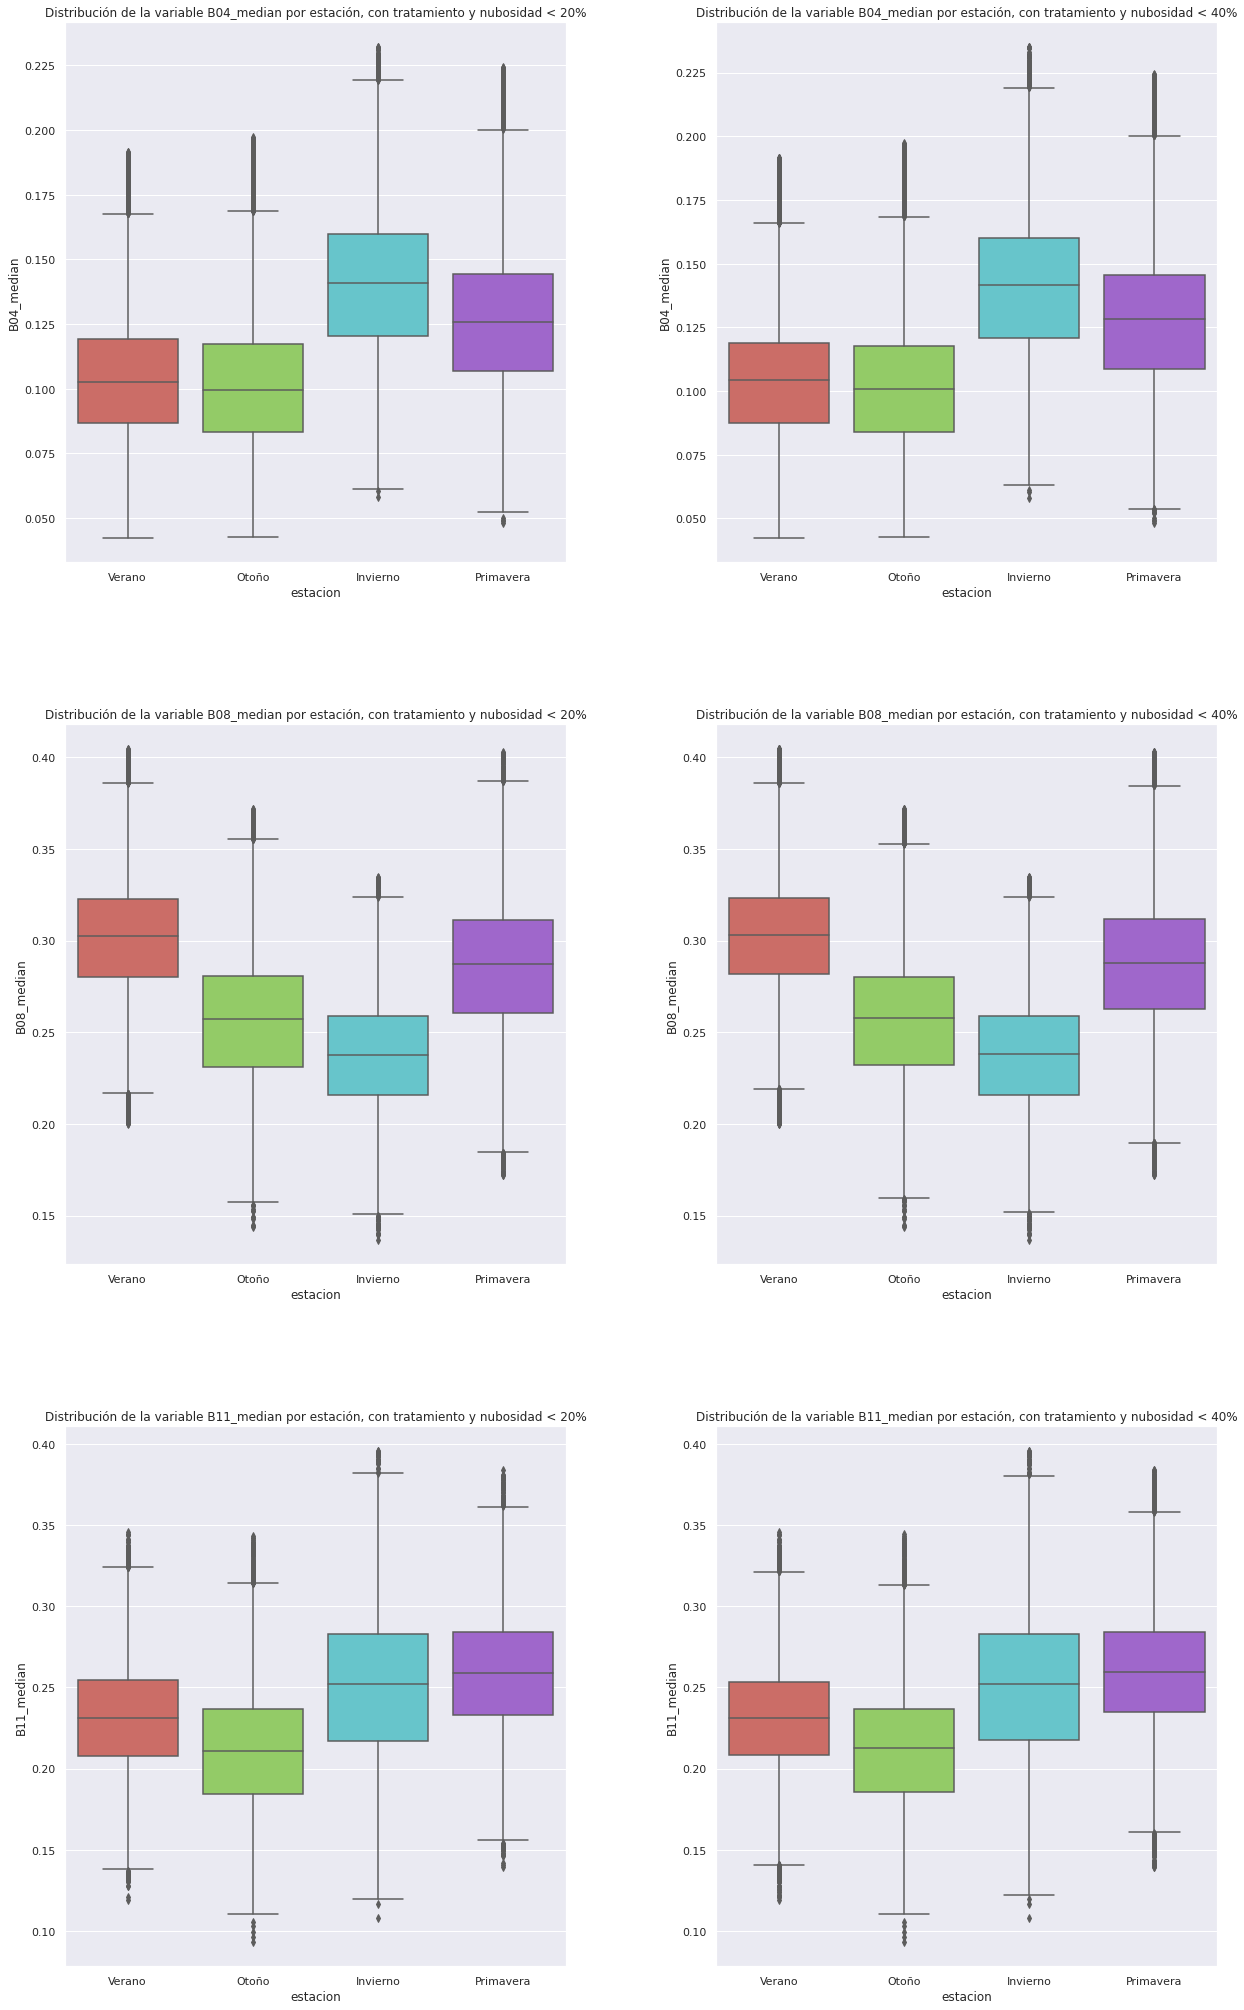

In [ ]:

#Boxplot para indices
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,30)) #ancho=20, alto=30

for index, col in enumerate(["B04_median", "B08_median", "B11_median"]):
  axes[index][0].set_title(f"Distribución de la variable {col} por estación, con tratamiento y nubosidad < 20%")
  sns.boxplot(data=df_C_final_20, x='estacion', y=col, palette="hls", ax=axes[index][0])

  
  axes[index][1].set_title(f"Distribución de la variable {col} por estación, con tratamiento y nubosidad < 40%")
  sns.boxplot(data=df_C_final_40, x='estacion', y=col, palette="hls", ax=axes[index][1])
 


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.3)
plt.show()

Vemos que las distribuciones practicamente no se ven afectadas al realizar un filtrado por nubosidad, previo haber hecho tratamiento de outliers. 

## [D] Imputacion Estacional + Filtrado Por Nubosidad + Normalizacion 

__NOTA__: Para ciertos algoritmos puede ser necesario normalizar los datos (para facilitar su convergencia). Se le ocurre alguna forma de hacerlo? (Existen muchas alternativas, elija alguna de ellas - justificando su eleccion). Utilizando alguna que le parezca interesante, actualice la siguiente receta basada en [C]

- Leer los datos
- Extraer las columnas de interes (## ab-initio)
- Remoción de Outliers (a nivel estacional - SIN refinar por año)
- Imputar valores nulos (definir el criterio, o estadistico, _media_, _mediana_, etc)
- Filtrar por nubosidad:
    - < 40%
- __NORMALIZACION__
- Grabar los datos transformados

In [ ]:
df_D= df_initio.copy()

In [ ]:
df_D.describe()

ndvi_median   mNDVI_median   gari_median  tcariOsavi_median  \
count  167260.000000  167260.000000  1.672600e+05      167260.000000   
mean        0.373979       1.085201  1.017226e+33           0.182268   
std         0.132312       0.812463  4.160192e+35           0.082500   
min        -0.217929     -15.764715 -3.473328e+01          -6.793653   
25%         0.267362       0.880755  8.934892e-01           0.154415   
50%         0.369258       1.079537  1.084467e+00           0.193955   
75%         0.478579       1.252952  1.249073e+00           0.224973   
max         0.772912     172.330429  1.701412e+38           1.954518   

         sipi_median    ndii_median     B04_median     B08_median  \
count  167260.000000  167260.000000  167263.000000  167263.000000   
mean        0.969624       0.067789       0.125373       0.271873   
std         0.253205       0.088415       0.045794       0.055516   
min       -22.149998      -0.297335       0.028200       0.024750   
25%         0.891668      -0.002238       0.094500       0.237100   
50%         0.956522       0.063278       0.118050       0.272500   
75%         1.054187       0.129625       0.146800       0.305900   
max        16.321413       0.672468       0.758600       0.868800   

          B11_median  clouds_on_raster       area_m2        osm_id  
count  167262.000000     208932.000000  2.089320e+05  2.089320e+05  
mean        0.238991         19.473638  1.249388e+04  4.343631e+08  
std         0.057024         33.424013  7.895730e+04  2.141069e+08  
min         0.021300          0.000000  4.225951e+02  1.331006e+06  
25%         0.204150          0.000000  2.066559e+03  2.867065e+08  
50%         0.238100          0.000000  3.812182e+03  3.596742e+08  
75%         0.274000         25.009939  6.644794e+03  6.059767e+08  
max         0.806100        100.000000  1.370630e+06  9.249657e+08

**Remoción de outliers**

In [ ]:
df_D_list=[df_C[mask_v], df_C[mask_o], df_C[mask_i], df_C[mask_p]] #cargamos df_C[mask] porque en esta instancia coincide con df_D[mask]

df_D_clear= clear_df_outliers(df_D_list, INDICES_BANDAS)


**Imputar valores nulos**

In [ ]:
lista_df_D=[df_D_clear[df_D_clear['estacion'] == 'Verano'], df_D_clear[df_D_clear['estacion'] == 'Otoño'], 
          df_D_clear[df_D_clear['estacion'] == 'Invierno'],df_D_clear[df_D_clear['estacion'] == 'Primavera']]

D_nan_median= imputacion_median_nan(lista_df_D, INDICES)

D_nan_mean= imputacion_mean_nan(lista_df_D, BANDAS)

df_D_imput= pd.concat([D_nan_median, D_nan_mean, df_D_clear[add+['estacion']]], axis=1) 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
df_D_imput.isnull().sum()

ndvi_median          0
mNDVI_median         0
gari_median          0
tcariOsavi_median    0
sipi_median          0
ndii_median          0
B04_median           0
B08_median           0
B11_median           0
raster               0
clouds_on_raster     0
area_m2              0
date                 0
osm_id               0
estacion             0
dtype: int64

**Filtrado por nubosidad**

In [ ]:
df_D_cloud_40= df_D_imput[df_D_imput['clouds_on_raster'] < 40]

In [ ]:
df_D_cloud_40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146439 entries, 0 to 181775
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ndvi_median        146439 non-null  float64       
 1   mNDVI_median       146439 non-null  float64       
 2   gari_median        146439 non-null  float64       
 3   tcariOsavi_median  146439 non-null  float64       
 4   sipi_median        146439 non-null  float64       
 5   ndii_median        146439 non-null  float64       
 6   B04_median         146439 non-null  float64       
 7   B08_median         146439 non-null  float64       
 8   B11_median         146439 non-null  float64       
 9   raster             146439 non-null  object        
 10  clouds_on_raster   146439 non-null  float64       
 11  area_m2            146439 non-null  float64       
 12  date               146439 non-null  datetime64[ns]
 13  osm_id             146439 non-null  int64   

**Normalización**

Al momento de decidir si un valor es atípico o no, hay que tener en cuenta los valores continuos, ya que si un valor es mucho más grande que otro puede pesar mucho más, cuando simplemente es que la escala 
es diferente por lo que es necesario homogeneizar los datos. Para esto se pueden aplicar las siguientes técnicas de escalado:

* Estandarización: una manera muy usada de escalar es mediante la medida estandarizada. La fórmula para esto es la siguiente:

$$
Z=\frac{x-\mu}{\sigma}
$$
Siendo $\mu$ la media y $\sigma$ la desviación típica cuyas fórmulas son:
$$
\mu=\frac{\sum_{i=0}^{N} x_{i}}{N}
$$

$$
\sigma=\frac{\sum_{i=0}^{N}\left(x_{i}-\mu\right)}{N}
$$

donde $N$ es el tamaño de la muestra.

Este método estandariza errores cuándo los parámetros de población son conocidos. Sobretodo trabaja bien para poblaciones que están normalmente distribuidas.

Se puede estandarizar el conjunto de datos utilizando el objeto StandardScaler de scikit-learn.

* Escalado por medio del rango: otra manera, que también es muy usada, es escalar por el rango. La fórmula de esta es la siguiente:
$$
X^{\prime}=\frac{X-X_{\min }}{X_{\max }-X_{\min }}
$$

  Esta característica suele traer todos los valores en el rango de $[0,1]$. Esta propiedad se suele llamar normalización basada en la unidad. Puede ser generalizado para restringir la gama de valores en el conjunto de datos entre cualesquiera puntos arbitrarios a y b utilizado la siguiente fórmula:

$$
X^{\prime}=a+\frac{\left(X-X_{\min }\right)(b-a)}{X_{\max }-X_{\min }}
$$

  Para realizar este escalado se utilizan el objeto MinMaxScaler de scikit-learn.

* Si los datos contienen muchos valores atípicos, es probable que el escalado utilizando la media y la varianza de los datos no funcione muy bien. En estos casos, puede usar RobustScaler de scikit-learn como reemplazo directo. Utiliza estimaciones más sólidas para el centro y rango de sus datos.

  Este es un enfoque para estandarizar las variables de entrada  ignorando los valores atípicos del cálculo de la media y la desviación estándar y luego usar los valores calculados para escalar la variable.

  Si la función de distribución $F$ de una variable aleatoria fuera exactamente normal, $\bar{X}$ seria el estimador conveniente de $\mu$, la media poblacional. Pero si $F$ es sólo aproximadamente normal, el comportamiento de $\bar{X}$ puede ser desastroso. Una indicación de este hecho se puede ver teniendo en cuenta que si una sola observación tiene un error grande, la media puede dar cualquier valor no representativo de la muestra. La incertidumbre en la especificación de $F$ hace que sea más conveniente usar métodos que funcionen "bien" aún cuando el modelo no sea conocido exactamente; en particular, cuando hay algunos datos "atipicos", estos son los llamados métodos robustos. Un método robusto sencillo es la media podada y la desviación construída a partir de ella.


In [ ]:
lista_df_D_cloud=[df_D_cloud_40[df_D_cloud_40['estacion'] == 'Verano'], df_D_cloud_40[df_D_cloud_40['estacion'] == 'Otoño'], 
          df_D_cloud_40[df_D_cloud_40['estacion'] == 'Invierno'], df_D_cloud_40[df_D_cloud_40['estacion'] == 'Primavera']]

outlier_verano_D=[]

outlier_otoño_D=[]

outlier_invierno_D=[]

outlier_primavera_D=[]



for i in INDICES_BANDAS:
  v=count_outliers(lista_df_D_cloud[0], i)
  outlier_verano_D.append(v)

  o=count_outliers(lista_df_D_cloud[1], i)
  outlier_otoño_D.append(o)

  i=count_outliers(lista_df_D_cloud[2], i)
  outlier_invierno_D.append(i)
  
for i in INDICES_BANDAS:
  p=count_outliers(lista_df_D_cloud[3], i)
  outlier_primavera_D.append(p)

In [ ]:
filas_D=['outlier_verano', 'outlier_otoño', 'outlier_invierno', 'outlier_primavera']
columnas_D= [INDICES_BANDAS]
datos_D= [outlier_verano_D, outlier_otoño_D, outlier_invierno_D, outlier_primavera_D]
resumen_outlier_D = pd.DataFrame(datos_D, columns=columnas_D, index=filas_D)
resumen_outlier_D 

ndvi_median mNDVI_median gari_median tcariOsavi_median  \
outlier_verano            128          347         163              1224   
outlier_otoño              20          878         267              1121   
outlier_invierno          344          797         179               536   
outlier_primavera          20          334         121              1333   

                  sipi_median ndii_median B04_median B08_median B11_median  
outlier_verano           1087         261        516        652        213  
outlier_otoño             961          62        475        244        196  
outlier_invierno          211         431        126         94         32  
outlier_primavera        1030         116        465        276        238

Como el dataset sigue teniendo valores atípicos diferenciando por estación, utilizaremos un escalado robusto para el proceso de normalización.

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
from sklearn.preprocessing import RobustScaler

In [ ]:
transformer = RobustScaler()

# df_D_cloud_40.loc[:,INDICES_BANDAS] = transformer.fit_transform(df_D_cloud_40[INDICES_BANDAS])

lista_df_D_cloud[0].loc[:,INDICES_BANDAS] = transformer.fit_transform(lista_df_D_cloud[0][INDICES_BANDAS]) #transformacion para registros en verano

lista_df_D_cloud[1].loc[:,INDICES_BANDAS] = transformer.fit_transform(lista_df_D_cloud[1][INDICES_BANDAS]) #transformacion para registros en otoño

lista_df_D_cloud[2].loc[:,INDICES_BANDAS] = transformer.fit_transform(lista_df_D_cloud[2][INDICES_BANDAS]) #transformacion para registros en invierno

lista_df_D_cloud[3].loc[:,INDICES_BANDAS] = transformer.fit_transform(lista_df_D_cloud[3][INDICES_BANDAS]) #transformacion para registros en otoño




/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
df_D_final= pd.concat([lista_df_D_cloud[0], lista_df_D_cloud[1], lista_df_D_cloud[2], lista_df_D_cloud[3]], axis=0)


In [ ]:
#df_D_final.shape

In [ ]:
df_D_final.describe()

ndvi_median   mNDVI_median    gari_median  tcariOsavi_median  \
count  146439.000000  146439.000000  146439.000000      146439.000000   
mean        0.022297       0.042883       0.010550          -0.027126   
std         0.707299       0.785534       0.759368           0.843064   
min        -2.653122      -2.318665      -2.595154          -2.723272   
25%        -0.486308      -0.481030      -0.496171          -0.510330   
50%         0.000000       0.000000       0.000000           0.000000   
75%         0.508931       0.507004       0.493736           0.488470   
max         2.416912       2.652339       2.671820           2.438409   

         sipi_median    ndii_median     B04_median     B08_median  \
count  146439.000000  146439.000000  146439.000000  146439.000000   
mean        0.104591       0.035520       0.011407      -0.005713   
std         0.799235       0.735908       0.750358       0.753962   
min        -2.704100      -2.405938      -2.197692      -2.462142   
25%        -0.446444      -0.485238      -0.525148      -0.516650   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.551602       0.514258       0.474522       0.483968   
max         2.677993       2.459231       2.850592       2.435131   

          B11_median  clouds_on_raster       area_m2        osm_id  
count  146439.000000     146439.000000  1.464390e+05  1.464390e+05  
mean       -0.001465          3.829864  1.318185e+04  4.319011e+08  
std         0.727889          8.754216  8.187621e+04  2.113241e+08  
min        -2.474576          0.000000  4.225951e+02  1.331006e+06  
25%        -0.513907          0.000000  2.140633e+03  2.867065e+08  
50%         0.000000          0.000000  3.932570e+03  3.592481e+08  
75%         0.487280          0.443073  6.813803e+03  6.059767e+08  
max         2.582193         37.477434  1.370630e+06  9.249657e+08

In [ ]:
#df_D_cloud_40.describe()

Boxplots luego de la normalización:

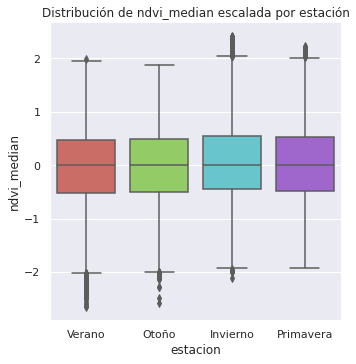

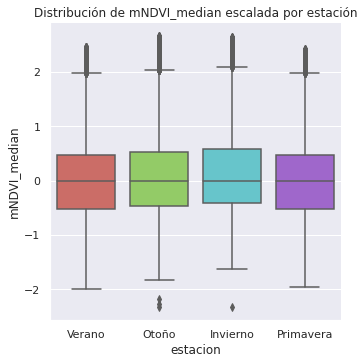

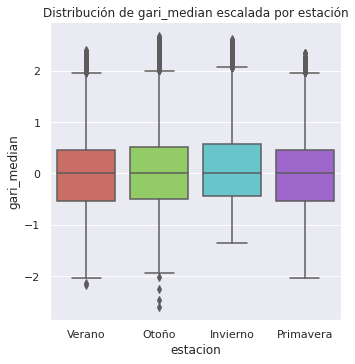

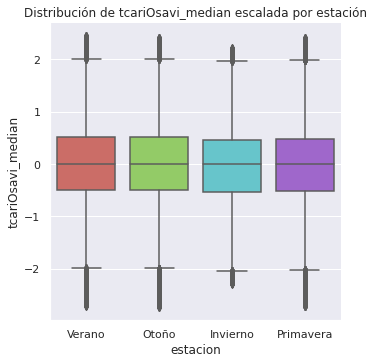

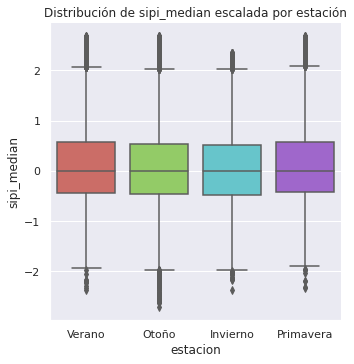

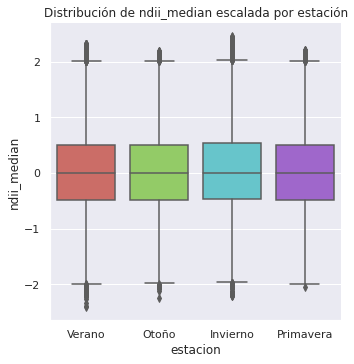

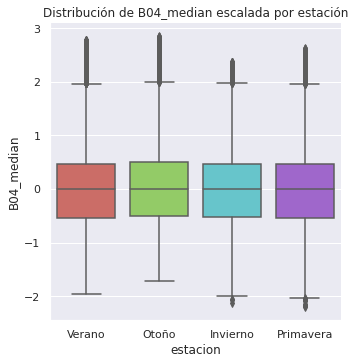

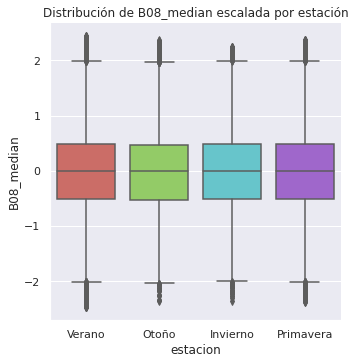

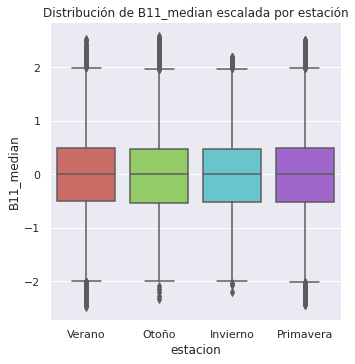

In [ ]:
sns.set(rc={'figure.figsize':(10, 5)})


for nombre in INDICES_BANDAS:
    sns.catplot(x = "estacion", y = nombre, data = df_D_final, kind = "box", palette="hls")
    eje.set_title(nombre)
    plt.title(f'Distribución de {nombre} escalada por estación')
    

plt.show()

## Recetas + Comparativa

Una vez generadas las recetas se debera generar una suerte de tabla comparativa entre las mismas, poniendo de relevancia la cantidad de datos desechados/recuperados en cada instancia. _Note que todos las recetas tienen un mismo eje_.

¿Cual es su percepcion de como resultaran cada una de las recetas en un algoritmo de aprendizaje?

¿Que pasa si en la receta [C] o [D] primero filtra por nubosidad y despues remueve outliers? Considere esto como variante y definalo como [C-1] y [C-2] ([D-1]/[D-2]).

In [ ]:
#Tabla comparativa
###################
# Datos de la tabla

inicio= [df_A.shape[0], df_B.shape[0], df_C.shape[0], df_C.shape[0], df_D.shape[0]]

clear_outliers= [df_A_clear.shape[0], df_B_clear.shape[0], df_C_clear.shape[0], df_C_clear.shape[0], df_D_clear.shape[0]]

NaN_imput= [df_A_imput.shape[0], df_B_imput.shape[0], df_C_imput.shape[0], df_C_imput.shape[0], df_D_imput.shape[0]]

clouds_filter= [df_A_clouds.shape[0], df_B_clouds.shape[0], df_C_20.shape[0], df_C_40.shape[0], df_D_cloud_40.shape[0]]

final= [df_A_clear.shape[0], df_B_clouds.shape[0], df_C_20.shape[0],  df_C_40.shape[0], df_D_final.shape[0]]

perdido= [abs(inicio[0]-final[0]), abs(inicio[1]-final[1]), abs(inicio[2]-final[2]), abs(inicio[3]-final[3]), abs(inicio[4]-final[4])]

In [ ]:
#Construcción de tabla comparativa
columnas=['Receta A', 'Receta B', 'Receta C < 20% nubes', 'Receta C < 40% nubes', 'Receta D']

filas= ['Tamaño inicial', 'Tratamiento de NaN', 'Limpieza de outliers', 'Filtro de nubes', 'Tamaño final', 'Datos perdidos']

datos= [inicio, NaN_imput, clear_outliers, clouds_filter, final, perdido]

comparacion = pd.DataFrame(datos, columns=columnas, index=filas)

comparacion

Receta A  Receta B  Receta C < 20% nubes  \
Tamaño inicial          208932    208932                208932   
Tratamiento de NaN      167260    179692                181776   
Limpieza de outliers    117795    179692                181776   
Filtro de nubes         137328    120998                133741   
Tamaño final            117795    120998                133741   
Datos perdidos           91137     87934                 75191   

                      Receta C < 40% nubes  Receta D  
Tamaño inicial                      208932    208932  
Tratamiento de NaN                  181776    181776  
Limpieza de outliers                181776    181776  
Filtro de nubes                     146439    146439  
Tamaño final                        146439    146439  
Datos perdidos                       62493     62493

In [ ]:
# #Tabla de recuperados
# recuperado= [" - ", abs(final[0]-final[1]), abs(final[1]-final[2]), abs(final[2]-final[3]), abs(final[3]-final[4])]

# columna= ['Datos recuperados']

# fila=[' A', 'B respecto A', 'C < 20% nubes respecto B ', ' C < 40% nubes respecto C < 20% nubes',
#          'D respecto C < 40% nubes']

# datos_recuperados= pd.DataFrame(recuperado, columns=columna, index=fila)
# datos_recuperados

¿Cual es su percepcion de como resultaran cada una de las recetas en un algoritmo de aprendizaje?

Tal como se hace foco en la presentación del trabajo, una de las intenciones del proceso de curacion es salvar, en base a ciertos supuestos, la mayor cantidad de datos debido a que la recolección de los mismos es costoso en terminos computacionales, de tiempo, etc.

Por otro lado, el objetivo de retener la mayor cantidad de registros tiene que ver con la performance numérica de los algoritmos de aprendizaje. Brindarle al algoritmo elegido una buena cantidad de datos de calidad, lo ayudará a construir un conjunto de entrenamiento que permitan lograr un modelo con una buena performance relacionada con el conjunto de validación. Por estas razones, es importante replicar los ambientes de entrenamiento y puesta en práctica, es decir que los datos de entrenamiento sean similares en contexto a los que se van a utilizar como entrada cuando el modelo esté desplegando.

Teniendo en cuenta estos objetivos y observando la tabla general, eliminar a secas los valores faltantes y luego quitar outliers de forma no especializada, es decir, sin considerar estacionalidad (receta A), resultaría en una performance numérica menos aceptable respecto al resto de las recetas. 

Por otro lado, discriminar outliers segun estacionalidad y luego imputar valores faltantes sería una mejor práctica para cumplir con el objetivo de conservar la mayor cantidad de datos, esto se puede apreciar entre las recetas B y C. De este modo la receta C tendrá una performance más aceptable que la B.

Por último, se hizo hincapié en la necesidad de tener datos escalados ya que ciertos algoritmos son sensibles a valores de variables donde las escalas difieren demasiado entre sí, por lo que performance también se verá afectada en casos donde las entradas no sean escaladas. Entonces, dependiendo del tipo de modelo que utilicemos, la receta que mejor se adaptaría para obtener buenas métricas de desempeño sería C o D.

**Variante: [C-1] y [C-2]**

[C-1] : Filtrado por nubosidad 

[C-2]: Remoción de outliers

In [ ]:
df_C_variante= df_initio.copy()

In [ ]:
df_C_variante.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208932 entries, 0 to 208931
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ndvi_median        167260 non-null  float64
 1   mNDVI_median       167260 non-null  float64
 2   gari_median        167260 non-null  float64
 3   tcariOsavi_median  167260 non-null  float64
 4   sipi_median        167260 non-null  float64
 5   ndii_median        167260 non-null  float64
 6   B04_median         167263 non-null  float64
 7   B08_median         167263 non-null  float64
 8   B11_median         167262 non-null  float64
 9   raster             208932 non-null  object 
 10  clouds_on_raster   208932 non-null  float64
 11  area_m2            208932 non-null  float64
 12  date               208932 non-null  object 
 13  osm_id             208932 non-null  int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 32.0+ MB


In [ ]:
#Agregamos la columna estación
df_C_variante['date'] = pd.to_datetime(df_C_variante.date, format='%Y/%m/%d')
df_C_variante['estacion'] = df_C_variante.date.map(season_of_date)

[C-1] : Filtrado por nubosidad menor al 40% (agregamos imputación de valores faltantes)

In [ ]:
df_C_1= df_C_variante[df_C_variante['clouds_on_raster'] < 40]
 

In [ ]:
df_C_1[add+['estacion']].shape

(170325, 6)

In [ ]:
df_verano_1= df_C_1[df_C_1['estacion'] == 'Verano']
df_otoño_1= df_C_1[df_C_1['estacion'] == 'Otoño']
df_invierno_1= df_C_1[df_C_1['estacion'] == 'Invierno']
df_primavera_1= df_C_1[df_C_1['estacion'] == 'Primavera']



In [ ]:
## Imputación simple

lista_df_C_1=[df_verano_1, df_otoño_1, df_invierno_1, df_primavera_1]

C_1_nan_median= imputacion_median_nan(lista_df_C_1, INDICES)
C_1_nan_mean= imputacion_mean_nan(lista_df_C_1, BANDAS)

df_C_1_imput= pd.concat([C_1_nan_median, C_1_nan_mean, df_C_1[add+['estacion']] ], axis=1).dropna(axis=0) 



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
# C_1_nan_median.shape, C_1_nan_mean.shape, df_C_1[add+['estacion']].shape

In [ ]:
df_C_1_imput.isna().sum()

ndvi_median          0
mNDVI_median         0
gari_median          0
tcariOsavi_median    0
sipi_median          0
ndii_median          0
B04_median           0
B08_median           0
B11_median           0
raster               0
clouds_on_raster     0
area_m2              0
date                 0
osm_id               0
estacion             0
dtype: int64

[C-2]: Remoción de outliers

In [ ]:
df_C_2_list=[df_C_1_imput[df_C_1_imput['estacion'] == 'Verano'], df_C_1_imput[df_C_1_imput['estacion'] == 'Otoño'], 
           df_C_1_imput[df_C_1_imput['estacion'] == 'Invierno'],df_C_1_imput[df_C_1_imput['estacion'] == 'Primavera']] #cargamos df_C[mask] porque en esta instancia coincide con df_D[mask]

df_C_2= clear_df_outliers(df_C_2_list, INDICES_BANDAS)

In [ ]:
df_C_variante_final= df_C_2

In [ ]:
#Construcción de tabla comparativa
##################################
# Datos:

inicio_1= [ df_C.shape[0], df_C_variante.shape[0]]

clear_outliers_1= [df_C_clear.shape[0], df_C_2.shape[0]]

NaN_imput_1= [ df_C_imput.shape[0], df_C_1_imput.shape[0]]

clouds_filter_1= [df_D_cloud_40.shape[0], df_C_1.shape[0]]

final_1= [ df_C_40.shape[0], df_C_variante_final.shape[0]]

perdido_1= [abs(inicio_1[0]-final_1[0]), abs(inicio_1[1]-final_1[1])]

In [ ]:
columnas_1=[ 'Receta C < 40% nubes', 'Variante receta C']
filas_1= ['Tamaño inicial', 'Filtro de nubes','Tratamiento de NaN', 'Limpieza de outliers',  'Tamaño final', 'Datos perdidos']
datos_1= [inicio_1,  clouds_filter_1, NaN_imput_1, clear_outliers_1, final_1, perdido_1]
comparacion_1 = pd.DataFrame(datos_1, columns=columnas_1, index=filas_1)
comparacion_1

Receta C < 40% nubes  Variante receta C
Tamaño inicial                      208932             208932
Filtro de nubes                     146439             170325
Tratamiento de NaN                  181776             137774
Limpieza de outliers                181776             114876
Tamaño final                        146439             114876
Datos perdidos                       62493              94056

En un contexto de estacionalidad, cuando primero filtramos por nubosidad y luego removemos outliers, la cantidad de datos que se pierden es mayor a que si lo hacemos en el orden contrario. Esto puede suceder debido a que la cantidad de datos que se filtran en función de la nubosidad es muy grande afectando de manera considerable a las distribuciones de las variables en estudio y por consiguiente, a los valores que se consideran como outliers en cada una de ellas.

Por otro lado, el porcentaje de nubosidad en el raster determina los datos faltantes y/o valaores atípicos dependiendo de ese porcentaje. Así para porcentajes de nubosidad del 40%, creemos (en base al análisis exploratorio realizado en el TP1) que los registros que le corresponden son considerados en su mayoría como NaNs en nuestra base de datos y, si ese porcentaje disminuye, los registros se consideran en su mayoría como outliers. Esto podría explicar la diferencia en la cantidad de datos que se pierden si primero hacemos el filtrado por nubosidad, ya que nos perdemos de la posibilidad de imputar los valores faltantes con algún estadístico que consideremos oportuno.



A continuacion mostramos el cambio de distribución de las variables entre la receta C y su variante:

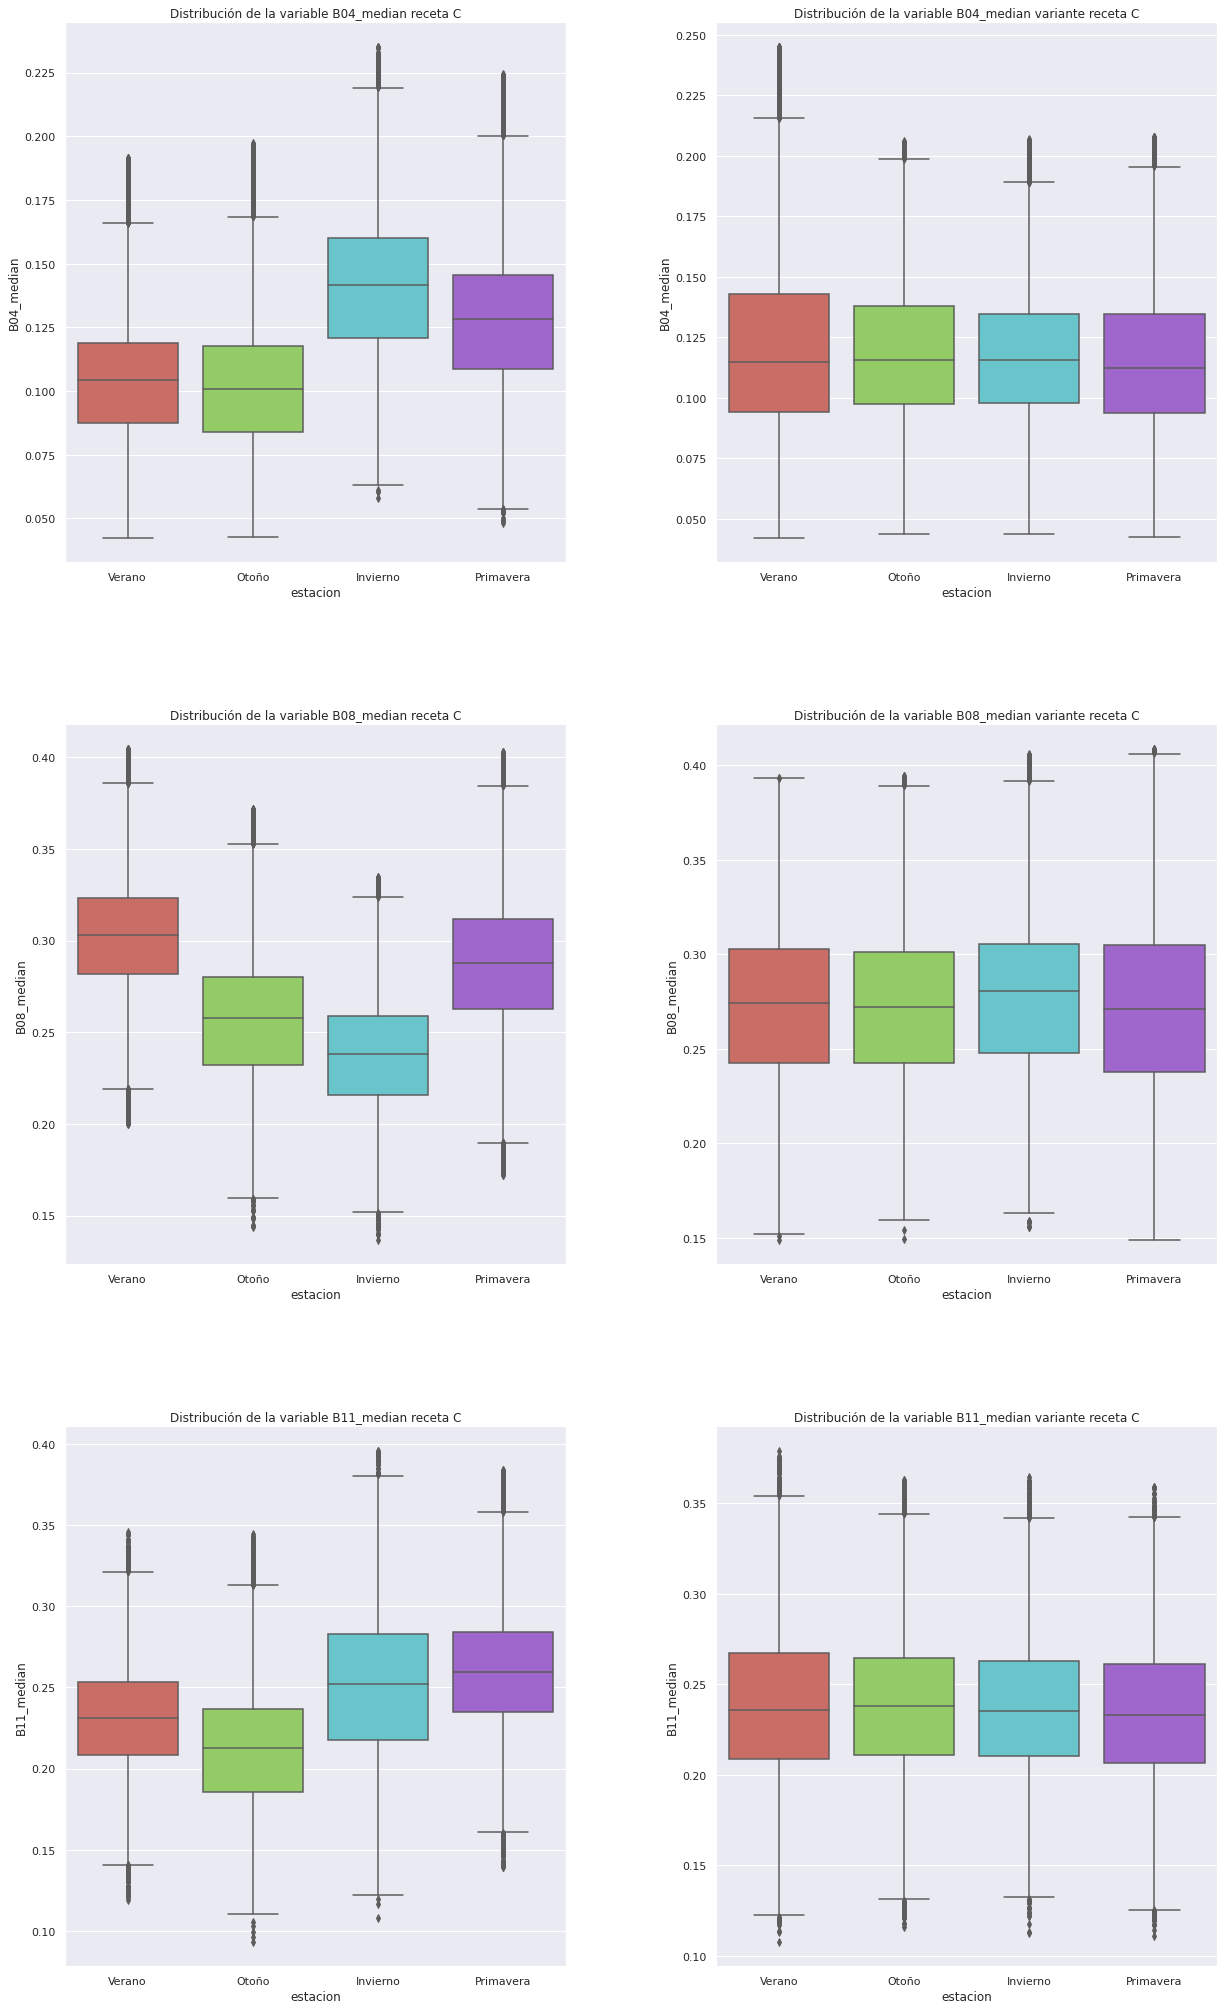

In [ ]:
#Boxplot para  bandas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,30)) #ancho=20, alto=30

for index, col in enumerate(["B04_median", "B08_median", "B11_median"]):
  axes[index][0].set_title(f"Distribución de la variable {col} receta C")
  sns.boxplot(data=df_C_40, x='estacion', y=col, palette="hls", ax=axes[index][0])

  
  axes[index][1].set_title(f"Distribución de la variable {col} variante receta C")
  sns.boxplot(data=df_C_variante_final, x='estacion', y=col, palette="hls", ax=axes[index][1])
 


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.3)
plt.show()